## Telecomm Churn Group Case Study

** The purpose of the case study is to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn **

### ** Importing required libraries**

In [1]:
# Importing pandas and numpy libraries
import pandas as pd
import numpy as np

# Importing libraries required for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Metrics library
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#importing libraries to scale the data
from sklearn.preprocessing import StandardScaler

#Importing the PCA module
from sklearn.decomposition import PCA

#performing logistic regression on the transformed data
from sklearn.linear_model import LogisticRegression

# SVM Module
from sklearn.svm import SVC

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost librarier
# import xgboost as xgb
# from xgboost import XGBClassifier
# from xgboost import plot_importance

import statsmodels.api as stats

from sklearn.feature_selection import RFE

from sklearn.linear_model import Lasso

In [2]:
# Read the data from the file into a dataframe

churn = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Start analysing the data

churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Inspecting the size of the dataset

churn.shape

(99999, 226)

**Observation** : there are 1 lakh records with 226 columns

In [5]:
# Setting for display for columns and rows

pd.set_option('max_info_columns', 226)
pd.options.display.max_rows = 230

In [6]:
# Information on the dataset

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

**Observation**: there are 179 columns of float type, 35 of int type and 12 of object type

In [7]:
# Find column wise percentage of nulls

churn.isnull().sum()/len(churn.index)

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

In [8]:
# Checking the percentage of null values in columns

null_df = pd.DataFrame((np.round((churn.isnull().sum())/len(churn.index),2)))
null_df['features'] = null_df.index
null_df = null_df.rename(columns= {0 : 'null_percentage'})
null_df.reset_index(drop = True, inplace = True)
null_df['null_percentage'].astype('category').value_counts()


0.00    60
0.04    59
0.74    30
0.05    30
0.08    29
0.75    10
0.01     5
0.02     3
Name: null_percentage, dtype: int64

**Observation**: There are around 40 columns containing nearly 75% of values as null. As of now we dont know what columns they are. <br>
we will revisit the null values after we filter out the high value customers

** Requirement **: Filter only the high end customers - One of the criterias in the requirement

Those who have recharged with an amount more than or equal to X, 
where X is the 70th percentile of the average recharge amount in the first two months (the good phase).


In [9]:
# Lets first check how many columns talk about recharge

cols = churn.columns

def rech_cols(cols):
    return [x for x in cols if 'rech' in x]
rech_list_cols = rech_cols(cols)
print(rech_list_cols)
print('Number of columns having rech in their name:',len(rech_list_cols))

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
Number of columns having rech in their name: 40


**Observation** : there are 40 columns containing 'rech'word in the column name. From this we use 'total_rech_amt_6' and 'total_rech_amt_7' columns to calculate the average recharge amount during the good phase(June and July)

In [10]:
# Calculating average recharge amount for months of 6 and 7
churn['total_amt_good_phase'] = (churn['total_rech_amt_6']+churn['total_rech_amt_7'])/2
churn['total_amt_good_phase'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: total_amt_good_phase, dtype: float64

In [11]:
# Taking a subset of only the High value customers by filtering the telecom churn dataframe as per requirement

churn = churn.loc[(churn['total_amt_good_phase'] > (np.percentile(churn.total_amt_good_phase,70)))]
churn.shape

(29979, 227)

In [12]:
# Drop the column. Not required further
churn.drop('total_amt_good_phase', axis=1, inplace=True)

In [13]:
churn.shape

(29979, 226)

** Requirement **: Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile 
internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [14]:
# Tag the churners as 1 and Non churners as 0

churn['churned'] = np.where((churn['total_ic_mou_9'] == 0) & (churn['total_og_mou_9'] == 0) & (churn['vol_2g_mb_9'] == 0) & (churn['vol_3g_mb_9'] == 0), '1', '0')

In [15]:
# Cast the resulting column into int datatype

churn.churned = churn.churned.apply(np.int64)

In [16]:
# Find the percentage of churners
((churn['churned'].value_counts())/len(churn.index))*100

# There is a class imbalance

0    91.363955
1     8.636045
Name: churned, dtype: float64

In [17]:
# Backup

churn_backup = churn.copy()

** Requirement **: Lets drop the columns related to 9th month. 9th month data is used ONLY to identify the churners. It is the churn month

In [18]:
churn = churn[churn.columns.drop(list(churn.filter(regex='_9')))]

In [19]:
# There is another column which has Sep data. Drop that as well.

churn.drop(['sep_vbc_3g'], axis=1, inplace=True)

In [20]:
# This dataset will be further analysed

churn.shape

(29979, 172)

### ** Data Imputations **:

In [21]:
# Check for columns containing one single value. They do not add any information to the model. They can be dropped

cols = list(churn)
nunique = churn.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [22]:
# Drop the identified columns

churn.drop(cols_to_drop, axis=1, inplace=True)

In [23]:
#The columns are dropped

churn.shape

(29979, 159)

In [24]:
# Find column wise percentage of nulls

(churn.isnull().sum()/len(churn.index))*100

# There are many columns with more than 70% datacells as Nulls.

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.054071
onnet_mou_7                  1.010707
onnet_mou_8                  3.128857
offnet_mou_6                 1.054071
offnet_mou_7                 1.010707
offnet_mou_8                 3.128857
roam_ic_mou_6                1.054071
roam_ic_mou_7                1.010707
roam_ic_mou_8                3.128857
roam_og_mou_6                1.054071
roam_og_mou_7                1.010707
roam_og_mou_8                3.128857
loc_og_t2t_mou_6             1.054071
loc_og_t2t_mou_7             1.010707
loc_og_t2t_mou_8             3.128857
loc_og_t2m_mou_6             1.054071
loc_og_t2m_mou_7             1.010707
loc_og_t2m_mou_8             3.128857
loc_og_t2f_mou_6             1.054071
loc_og_t2f_mou_7             1.010707
loc_og_t2f_mou_8             3.128857
loc_og_t2c_mou_6             1.054071
loc_og_t2c_m

In [25]:
# Identify columns that are categorical in nature, the missing values in these cols cannot be imputed with 0 values, 
# these will be imputed with -1 (implying
# a new category)

for column_name in churn.loc[:, (churn.dtypes == 'float64')  | (churn.dtypes == 'int64')].columns:
    if churn[column_name].min() == 0 and  churn[column_name].max() == 1 :
        churn[column_name].fillna(-1, inplace = True)

In [26]:
# There are a lot of NaN/ null values in the dataframe, let us explore

In [27]:
missing_df = churn.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

C:\Users\Raghavendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


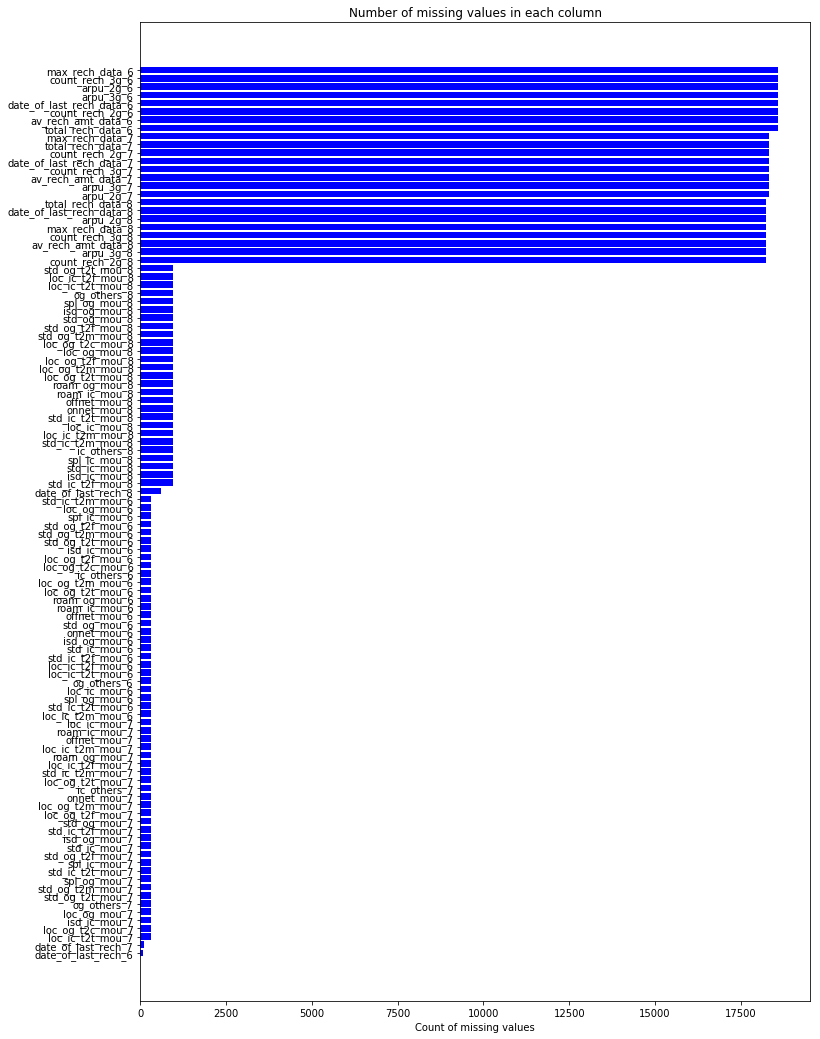

In [28]:
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [29]:
# ****** We see that most of the Internet Data related information columns contains more that 60% Null values *****

In [30]:
# Requirement document mentions that the null values in total_rech_data_* and av_rech_amt_data_* can be imputed to 0 
# since their corresponding date_of_last_rech_data is also null. Checking this:

In [31]:
churn[churn.filter(like='total_rech_data_').columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 3 columns):
total_rech_data_6    11387 non-null float64
total_rech_data_7    11652 non-null float64
total_rech_data_8    11741 non-null float64
dtypes: float64(3)
memory usage: 936.8 KB


In [32]:
churn[churn.filter(like='av_rech_amt_data_').columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 3 columns):
av_rech_amt_data_6    11387 non-null float64
av_rech_amt_data_7    11652 non-null float64
av_rech_amt_data_8    11741 non-null float64
dtypes: float64(3)
memory usage: 936.8 KB


In [33]:
churn[churn.filter(like='date_of_last_rech_data_').columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_data_6    11387 non-null object
date_of_last_rech_data_7    11652 non-null object
date_of_last_rech_data_8    11741 non-null object
dtypes: object(3)
memory usage: 936.8+ KB


In [34]:
# We see that same number of rows have the null values and hence can be imputed with 0. Done that in the next statement.

In [35]:
# Impute value 0 in all the Float datatype columns. We do not intend to lose the information available. 
# Hence NOT deleting the columns although null values are high

churn.loc[:, churn.dtypes == 'float64'] = churn.loc[:, churn.dtypes == 'float64'].fillna(0)

In [36]:
# Impute value 0 in all the Int datatype columns. We do not intend to lose the information available. 
# Hence NOT deleting the columns although null values are high

churn.loc[:, churn.dtypes == 'int'] = churn.loc[:, churn.dtypes == 'int'].fillna(0)

In [37]:
# Compute Null values percentage

(churn.isnull().sum()/len(churn.index))*100

mobile_number                0.000000
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  0.000000
onnet_mou_7                  0.000000
onnet_mou_8                  0.000000
offnet_mou_6                 0.000000
offnet_mou_7                 0.000000
offnet_mou_8                 0.000000
roam_ic_mou_6                0.000000
roam_ic_mou_7                0.000000
roam_ic_mou_8                0.000000
roam_og_mou_6                0.000000
roam_og_mou_7                0.000000
roam_og_mou_8                0.000000
loc_og_t2t_mou_6             0.000000
loc_og_t2t_mou_7             0.000000
loc_og_t2t_mou_8             0.000000
loc_og_t2m_mou_6             0.000000
loc_og_t2m_mou_7             0.000000
loc_og_t2m_mou_8             0.000000
loc_og_t2f_mou_6             0.000000
loc_og_t2f_mou_7             0.000000
loc_og_t2f_mou_8             0.000000
loc_og_t2c_mou_6             0.000000
loc_og_t2c_m

In [38]:
# We see from the above results The last date of data recharge columns have high percentage of nulls (>60%). 
# Hence can be removed

churn = churn[churn.columns.drop(list(churn.filter(regex='date_of_last_rech_data_')))]

In [39]:
churn.shape

(29979, 156)

In [40]:
# From the above The last date of recharge columns have fewer rows (less than 2%) with null values. 
# Hence deleting those rows.

churn = churn[~churn['date_of_last_rech_6'].isnull()]

In [41]:
churn = churn[~churn['date_of_last_rech_7'].isnull()]

In [42]:
churn = churn[~churn['date_of_last_rech_8'].isnull()]

In [43]:
churn.shape

(29285, 156)

In [44]:
# Compute Null values percentage

(churn.isnull().sum()/len(churn.index))*100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
s

### The dataframe no more has null values and is ready for EDA

### ** Exploratory Data Analysis with Data Visualizations **:

In [45]:
# Now find the percentage of churners

(((churn['churned'].value_counts())/len(churn.index))*100).reset_index()



,index,churned
0,0,92.310056
1,1,7.689944


### Perform Univariate Analysis

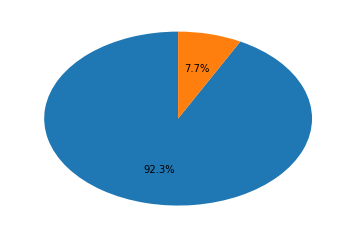

In [46]:
# Plot showing the Churn distribution

plt.pie((((churn['churned'].value_counts())/len(churn.index))*100).reset_index()['churned'], autopct='%1.1f%%', startangle=90, radius = 1)
plt.show()

Since the percentage of the two categories is skewed, there is a class imbalance and may cause the algorithms to 
wrongly tag the churners as non churners. This imbalance would have be handled through sampling techniques and enable
the algorithms to carry out accurate predictions

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


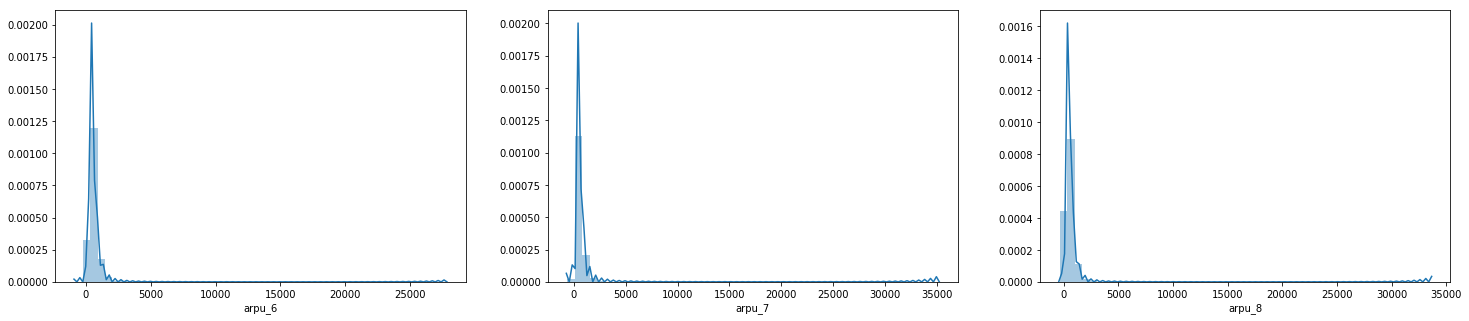

In [47]:
# Plotting the distribution of average revenue per user

plt.figure(figsize = (25,5))
plt.subplot(131)
sns.distplot(churn['arpu_6'])
plt.subplot(132)
sns.distplot(churn['arpu_7'])
plt.subplot(133)
sns.distplot(churn['arpu_8'])
plt.show()

** Inference **: arpu is mostly in range of 0-2000. The Average Revenue per user is less than 2000 rupees for most of the users

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


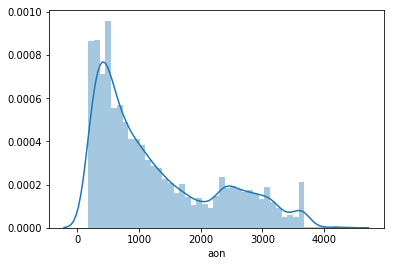

In [48]:
# Distribution of age on network on the loyalty - Age on network

sns.distplot(churn['aon'])
plt.show()

** Observation **: There are many fairly new customers compared to long time customers

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


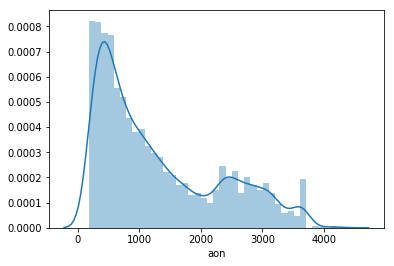

In [49]:
# Finding the above for Non churners

sns.distplot(churn[churn['churned'] == 0]['aon'])
plt.show()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


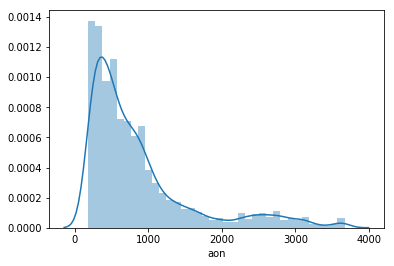

In [50]:
# Finding the above for Churners

sns.distplot(churn[churn['churned'] == 1]['aon'])
plt.show()

** Observation **: Churners are relatively less among the long time customers. They are Loyal customers

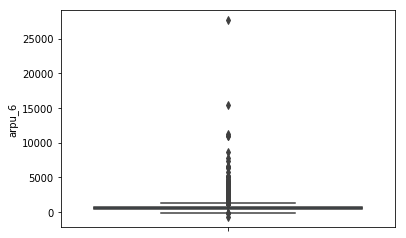

In [51]:
# Distribution of Avg revenue per user

ax = sns.boxplot(y="arpu_6", data=churn)
plt.show()

There are outliers in the data

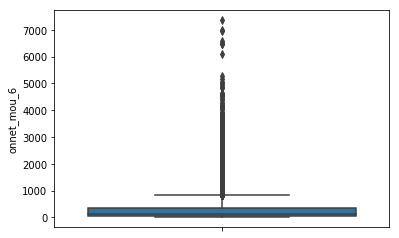

In [52]:
# Distribution of On Net Minutes of Usage

ax = sns.boxplot(y="onnet_mou_6", data=churn)
plt.show()

In [53]:
# There seems to be outliers. Handle Outliers

churn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churned
count,2.928500e+04,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,...,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000,29285.000000
mean,7.001223e+09,585.997598,593.970142,543.343699,296.986643,307.625938,272.270375,416.947567,426.023489,379.692132,...,0.152467,0.143828,-0.273997,-0.256138,-0.264197,1264.535394,132.106024,136.844995,122.005416,0.076899
std,6.839714e+05,433.328362,462.568502,491.943410,459.857332,483.582415,469.613193,467.086258,484.906552,475.279448,...,0.978638,0.986457,0.941055,0.943850,0.930095,973.670669,394.552137,411.206301,391.038020,0.266436
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,364.811000,368.927000,299.079000,41.890000,42.310000,29.310000,137.760000,138.230000,101.380000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001232e+09,495.073000,496.588000,458.057000,126.790000,127.930000,103.240000,282.390000,284.910000,246.180000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,917.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001813e+09,701.199000,703.600000,677.290000,355.730000,366.410000,304.380000,522.490000,535.730000,488.590000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1920.000000,5.490000,3.430000,0.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,35.000000,41.000000,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000


In [54]:
# Work on the copy of the dataset

ch = churn.copy()

In [55]:
# Identify Outliers

ch.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1, inplace=True)
list_of_cols = list(ch.columns.values)


In [56]:
# Identify extreme outliers and display the number of rows affected - First Method

for c in list_of_cols:
    extreme_outlier = ch[c].quantile(0.75)+(3*(ch[c].quantile(0.75)-ch[c].quantile(0.25)))
    #ch = ch.loc[ch[c] < extreme_outlier]
    no_of_rows = len(ch.loc[ch[c] > extreme_outlier])
    print(c, "-Outlier-", extreme_outlier, "-No of rows affected-", no_of_rows)

arpu_6 -Outlier- 1710.3629999999998 -No of rows affected- 481
arpu_7 -Outlier- 1707.6190000000001 -No of rows affected- 519
arpu_8 -Outlier- 1811.9229999999998 -No of rows affected- 431
onnet_mou_6 -Outlier- 1297.25 -No of rows affected- 1131
onnet_mou_7 -Outlier- 1338.71 -No of rows affected- 1198
onnet_mou_8 -Outlier- 1129.5900000000001 -No of rows affected- 1446
offnet_mou_6 -Outlier- 1676.68 -No of rows affected- 747
offnet_mou_7 -Outlier- 1728.23 -No of rows affected- 703
offnet_mou_8 -Outlier- 1650.2199999999998 -No of rows affected- 663
roam_ic_mou_6 -Outlier- 0.0 -No of rows affected- 6857
roam_ic_mou_7 -Outlier- 0.0 -No of rows affected- 5626
roam_ic_mou_8 -Outlier- 0.0 -No of rows affected- 5876
roam_og_mou_6 -Outlier- 0.0 -No of rows affected- 6934
roam_og_mou_7 -Outlier- 0.0 -No of rows affected- 5696
roam_og_mou_8 -Outlier- 0.0 -No of rows affected- 5900
loc_og_t2t_mou_6 -Outlier- 342.03000000000003 -No of rows affected- 1499
loc_og_t2t_mou_7 -Outlier- 341.02000000000004 -

sachet_3g_7 -Outlier- 0.0 -No of rows affected- 1936
sachet_3g_8 -Outlier- 0.0 -No of rows affected- 1727
fb_user_6 -Outlier- 7.0 -No of rows affected- 0
fb_user_7 -Outlier- 7.0 -No of rows affected- 0
fb_user_8 -Outlier- 7.0 -No of rows affected- 0
aon -Outlier- 6240.0 -No of rows affected- 0
aug_vbc_3g -Outlier- 21.96 -No of rows affected- 6911
jul_vbc_3g -Outlier- 13.72 -No of rows affected- 7027
jun_vbc_3g -Outlier- 0.0 -No of rows affected- 7071
churned -Outlier- 0.0 -No of rows affected- 2252


In [57]:
# Outliers Detection - Second method

# Standardise the data values so that all the columns data are in comparable scale

def standardise (x): 
    return ( (x-np.mean(x)).abs()/ x.std())
                                            
                                              
# applying standardise ( ) to all columns 
ch = ch.apply(standardise)

for c in list_of_cols:
    no_of_rows = len(ch.loc[ch[c] > 3])
    print(c, "-No of rows affected-", no_of_rows)

arpu_6 -No of rows affected- 327
arpu_7 -No of rows affected- 311
arpu_8 -No of rows affected- 281
onnet_mou_6 -No of rows affected- 598
onnet_mou_7 -No of rows affected- 603
onnet_mou_8 -No of rows affected- 613
offnet_mou_6 -No of rows affected- 595
offnet_mou_7 -No of rows affected- 547
offnet_mou_8 -No of rows affected- 522
roam_ic_mou_6 -No of rows affected- 482
roam_ic_mou_7 -No of rows affected- 377
roam_ic_mou_8 -No of rows affected- 392
roam_og_mou_6 -No of rows affected- 542
roam_og_mou_7 -No of rows affected- 515
roam_og_mou_8 -No of rows affected- 413
loc_og_t2t_mou_6 -No of rows affected- 450
loc_og_t2t_mou_7 -No of rows affected- 420
loc_og_t2t_mou_8 -No of rows affected- 393
loc_og_t2m_mou_6 -No of rows affected- 511
loc_og_t2m_mou_7 -No of rows affected- 527
loc_og_t2m_mou_8 -No of rows affected- 561
loc_og_t2f_mou_6 -No of rows affected- 417
loc_og_t2f_mou_7 -No of rows affected- 431
loc_og_t2f_mou_8 -No of rows affected- 489
loc_og_t2c_mou_6 -No of rows affected- 362


** Observation **: Since there are multiple columns, it might not be correct to handle outlier treatment at each column level. Hence no changes are made

### Bivariate Analysis

In [58]:
# To show the trend in the average revenue collection from June to Aug

churn_arpu = pd.melt(churn[['mobile_number', 'churned', 'arpu_6', 'arpu_7', 'arpu_8']], id_vars = ['mobile_number', 'churned'], value_name = 'arpu_amt' )

In [59]:
churn_arpu.head()

,mobile_number,churned,variable,arpu_amt
0,7000701601,1,arpu_6,1069.180
1,7001524846,0,arpu_6,378.721
2,7002191713,0,arpu_6,492.846
3,7000875565,0,arpu_6,430.975
4,7000187447,0,arpu_6,690.008


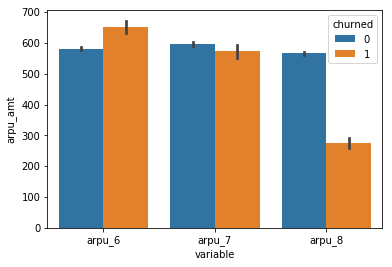

In [60]:
# The churners data shows that the average collection of revenue has a decreasing trend in 8th month

sns.barplot(x = 'variable', y = 'arpu_amt', hue = 'churned', data = churn_arpu)
plt.show()

** Observation **: The Avg revenue per user drops in 8th month for churners

In [61]:
# Similar study on the Minutes of Usage 

churn_total_og_mou = pd.melt(churn[['mobile_number', 'churned', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_og_mou' )

In [62]:
churn_total_og_mou.head()

,mobile_number,churned,variable,total_og_mou
0,7000701601,1,total_og_mou_6,487.53
1,7001524846,0,total_og_mou_6,508.36
2,7002191713,0,total_og_mou_6,907.09
3,7000875565,0,total_og_mou_6,346.81
4,7000187447,0,total_og_mou_6,1249.53


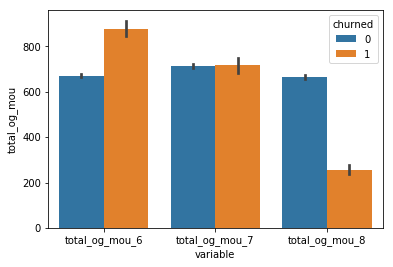

In [63]:
# Minutes of Usage trend on churned and Non churned customers

sns.barplot(x = 'variable', y = 'total_og_mou', hue = 'churned', data = churn_total_og_mou)
plt.show()

** Observation **: The minutes of usage drops from 6 to 8th month for churners,in fact, it can also be noticed that Churners have a very high MoU in the 6th month 

In [64]:
# Add up the Minutes of usage on Net and Offnet services 

churn['net_mou_6'] = churn['onnet_mou_6'] + churn['offnet_mou_6']
churn['net_mou_7'] = churn['onnet_mou_7'] + churn['offnet_mou_7']
churn['net_mou_8'] = churn['onnet_mou_8'] + churn['offnet_mou_8']


In [65]:
churn_net_mou = pd.melt(churn[['mobile_number', 'churned', 'net_mou_6', 'net_mou_7', 'net_mou_8']], id_vars = ['mobile_number', 'churned'], value_name = 'net_mou' )

In [66]:
churn_net_mou.head()

,mobile_number,churned,variable,net_mou
0,7000701601,1,net_mou_6,511.27
1,7001524846,0,net_mou_6,508.35
2,7002191713,0,net_mou_6,915.07
3,7000875565,0,net_mou_6,346.80
4,7000187447,0,net_mou_6,1247.55


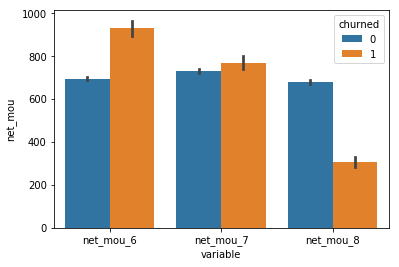

In [67]:
# Trend of Internet minutes of Usage with churners and Non Churners

sns.barplot(x = 'variable', y = 'net_mou', hue = 'churned', data = churn_net_mou)
plt.show()

** Observation **: Net usage is reducing with the churners in August

In [68]:
# Pattern on the Average recharge amount on Data

churn_avg_rech_amt = pd.melt(churn[['mobile_number', 'churned', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']], id_vars = ['mobile_number', 'churned'], value_name = 'avg_rech_amt' )

churn_avg_rech_amt.head()



,mobile_number,churned,variable,avg_rech_amt
0,7000701601,1,av_rech_amt_data_6,0.0
1,7001524846,0,av_rech_amt_data_6,0.0
2,7002191713,0,av_rech_amt_data_6,0.0
3,7000875565,0,av_rech_amt_data_6,0.0
4,7000187447,0,av_rech_amt_data_6,0.0


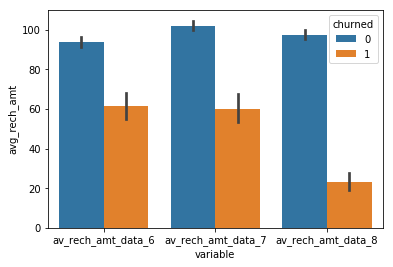

In [69]:
# Relative pattern of Churners and Non churners

sns.barplot(x = 'variable', y = 'avg_rech_amt', hue = 'churned', data = churn_avg_rech_amt)
plt.show()

** Observation **: Average recharge amount on Data has decreased from June to August with Churners

These dataframes were created only for visualization purposes, now we can get rid of them

In [70]:
del churn_arpu, churn_total_og_mou, churn_net_mou, churn_avg_rech_amt

In [71]:
# Added derived column net_mou_6 = onnet_mou_6 + offnet_mou_6
# Likewise net_mou_7, net_mou_8

# Hence the later columns may be removed

# churn.drop(['onnet_mou_6', 'offnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'onnet_mou_8', 'offnet_mou_8'], axis=1, inplace=True)

#OR

# delete the news columns added

# churn.drop(['net_mou_6', 'net_mou_7', 'net_mou_8'], axis=1, inplace=True)

In [72]:
# Lets drop the base value columns 

churn.drop(['onnet_mou_6', 'offnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'onnet_mou_8', 'offnet_mou_8'], axis=1, inplace=True)

In [73]:
# To confirm that total_og_mou is aggregate of the different types of Outgoing calls 

og = churn[['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6','std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6']]

In [74]:
og['total'] = og['loc_og_t2t_mou_6']+og['loc_og_t2m_mou_6']+og['loc_og_t2f_mou_6']+og['loc_og_t2c_mou_6']+og['std_og_t2t_mou_6']+og['std_og_t2m_mou_6']+og['std_og_t2f_mou_6']+og['isd_og_mou_6']+og['spl_og_mou_6']+og['og_others_6']



C:\Users\Raghavendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
# We see that it is the aggregate of all the OG calls.

og[['total','total_og_mou_6']]

,total,total_og_mou_6
7,487.50,487.53
8,508.34,508.36
13,907.07,907.09
16,346.78,346.81
17,1249.50,1249.53
21,860.33,860.34
24,568.12,564.63
33,0.00,0.00
38,337.84,337.86
41,318.72,318.76


In [76]:
# The columns total_og_mou_6 is aggregation of all the Outgoing calls made in 6th month. So the rest of the 
# Out Going calls minutes of usage columns will be redundant. And hence can be removed

In [77]:
# Drop the identified columns

churn.drop(['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6','std_og_t2f_mou_6'], axis=1, inplace=True)

In [78]:
# Similarly for 7th month Drop the identified columns

churn.drop(['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7','std_og_t2f_mou_7'], axis=1, inplace=True)

In [79]:
# Similarly for the 8th month Drop the identified columns

churn.drop(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8','std_og_t2f_mou_8'], axis=1, inplace=True)

In [80]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

churn.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6','std_ic_t2f_mou_6'], axis=1, inplace=True)

In [81]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

churn.drop(['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7','std_ic_t2f_mou_7'], axis=1, inplace=True)

In [82]:
# Similarly total_ic_mou will be the aggregate of all the different kinds of incoming calls and can be removed

churn.drop(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8','std_ic_t2f_mou_8'], axis=1, inplace=True)

In [83]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29285 entries, 7 to 99997
Data columns (total 114 columns):
mobile_number          29285 non-null int64
arpu_6                 29285 non-null float64
arpu_7                 29285 non-null float64
arpu_8                 29285 non-null float64
roam_ic_mou_6          29285 non-null float64
roam_ic_mou_7          29285 non-null float64
roam_ic_mou_8          29285 non-null float64
roam_og_mou_6          29285 non-null float64
roam_og_mou_7          29285 non-null float64
roam_og_mou_8          29285 non-null float64
loc_og_mou_6           29285 non-null float64
loc_og_mou_7           29285 non-null float64
loc_og_mou_8           29285 non-null float64
std_og_mou_6           29285 non-null float64
std_og_mou_7           29285 non-null float64
std_og_mou_8           29285 non-null float64
isd_og_mou_6           29285 non-null float64
isd_og_mou_7           29285 non-null float64
isd_og_mou_8           29285 non-null float64
spl_og_mou_6      

In [84]:
# The following columns of mou are aggregated further in total_mou columns and therefore can be considered for 
# deletion if required.

# These are redundant unless specific dependencies have to be analysed. Else can be removed.


In [85]:

#['roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_6', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
#'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8','loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
#'std_ic_mou_6','std_ic_mou_7', 'std_ic_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
#'isd_og_mou_6', 'isd_og_mou_7','isd_og_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
#'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
#'og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']

In [86]:
# Pattern on the minutes of usage of Total Incoming calls on the Churners

churn_total_ic_mou = pd.melt(churn[['mobile_number', 'churned', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_mou' )

churn_total_ic_mou.head()

,mobile_number,churned,variable,total_mou
0,7000701601,1,total_ic_mou_6,626.46
1,7001524846,0,total_ic_mou_6,103.86
2,7002191713,0,total_ic_mou_6,968.61
3,7000875565,0,total_ic_mou_6,364.86
4,7000187447,0,total_ic_mou_6,91.88


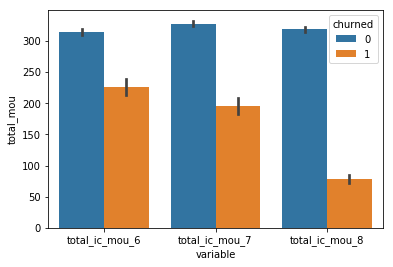

In [87]:
# Relative pattern of Churners and Non churners

sns.barplot(x = 'variable', y = 'total_mou', hue = 'churned', data = churn_total_ic_mou)
plt.show()

# There is a decreasing trend month on month

** Observation **: The incoming calls trend reduces for churners

In [88]:
# Pattern on the total recharge amount by the customer

churn_total_rech_amt = pd.melt(churn[['mobile_number', 'churned', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_rech_amt' )

In [89]:
churn_total_rech_amt.head()

,mobile_number,churned,variable,total_rech_amt
0,7000701601,1,total_rech_amt_6,1580
1,7001524846,0,total_rech_amt_6,437
2,7002191713,0,total_rech_amt_6,507
3,7000875565,0,total_rech_amt_6,570
4,7000187447,0,total_rech_amt_6,816


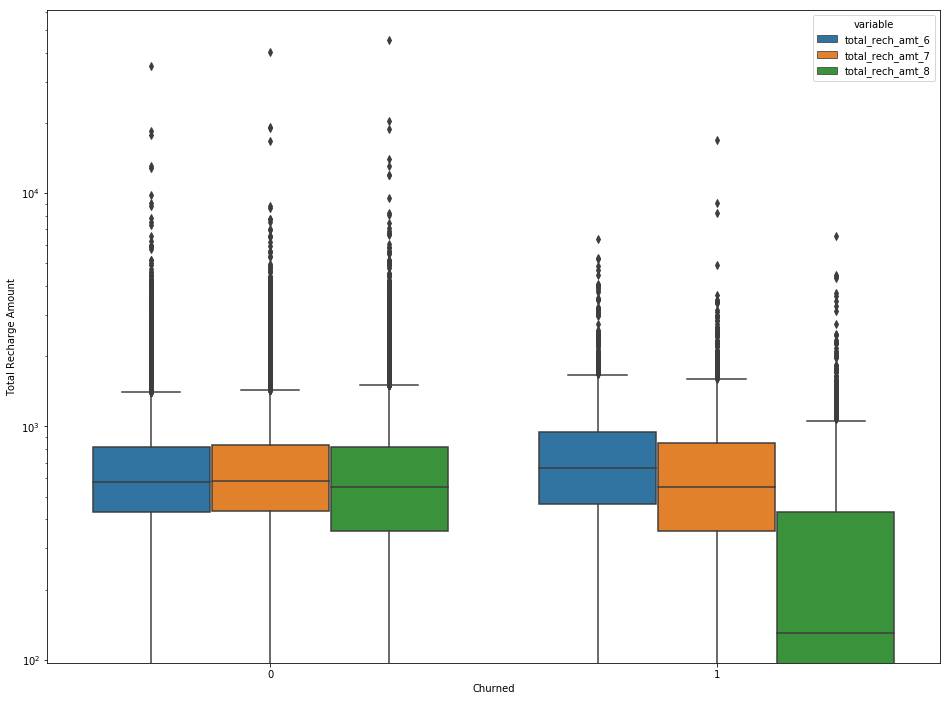

In [90]:
# This plot shows a drastic decline of the total recharge amount in the churned customers where as it stays consistent 
# for non churned customers

plt.figure(figsize = (16,12))
plt.yscale('log')
ax = sns.boxplot(x = 'churned', y = 'total_rech_amt', hue = 'variable', data = churn_total_rech_amt)
ax.set(ylabel = 'Total Recharge Amount', xlabel = 'Churned')
plt.show()

** Observation **: Shows decline of the total recharge amount in the churned customers where as it stays consistent for non churned customers


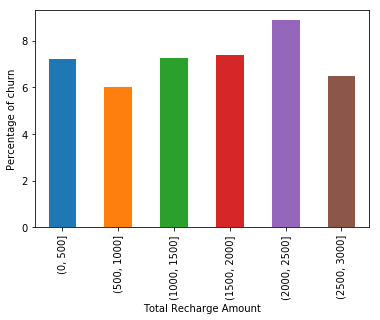

In [91]:
# Does higher recharge amount imply higher churn rate?
# High recharge customers seem to have a higher churn percentage

bins = range(0,3500,500)
fig, ax = plt.subplots()
fig.canvas.draw()

ymarks=[i for i in range(0,14,2)]
ax.set_yticklabels(ymarks)
churn_total_rech_amt.groupby(pd.cut(churn_total_rech_amt['total_rech_amt'], bins=bins)).churned.mean().plot(kind = 'bar')
plt.ylabel('Percentage of churn')
plt.xlabel('Total Recharge Amount')
plt.show()

In [92]:
# We do not need the above temporary data frames anymore and can be deleted

del churn_total_ic_mou, churn_total_rech_amt

In [93]:
churn.shape

(29285, 114)

In [94]:
# We have seen base values and cummalative values so far which are duplicate in nature and got rid of the 
# columns containing base values

# Let us see if there is still any correlation

In [95]:
corr = churn.corr()

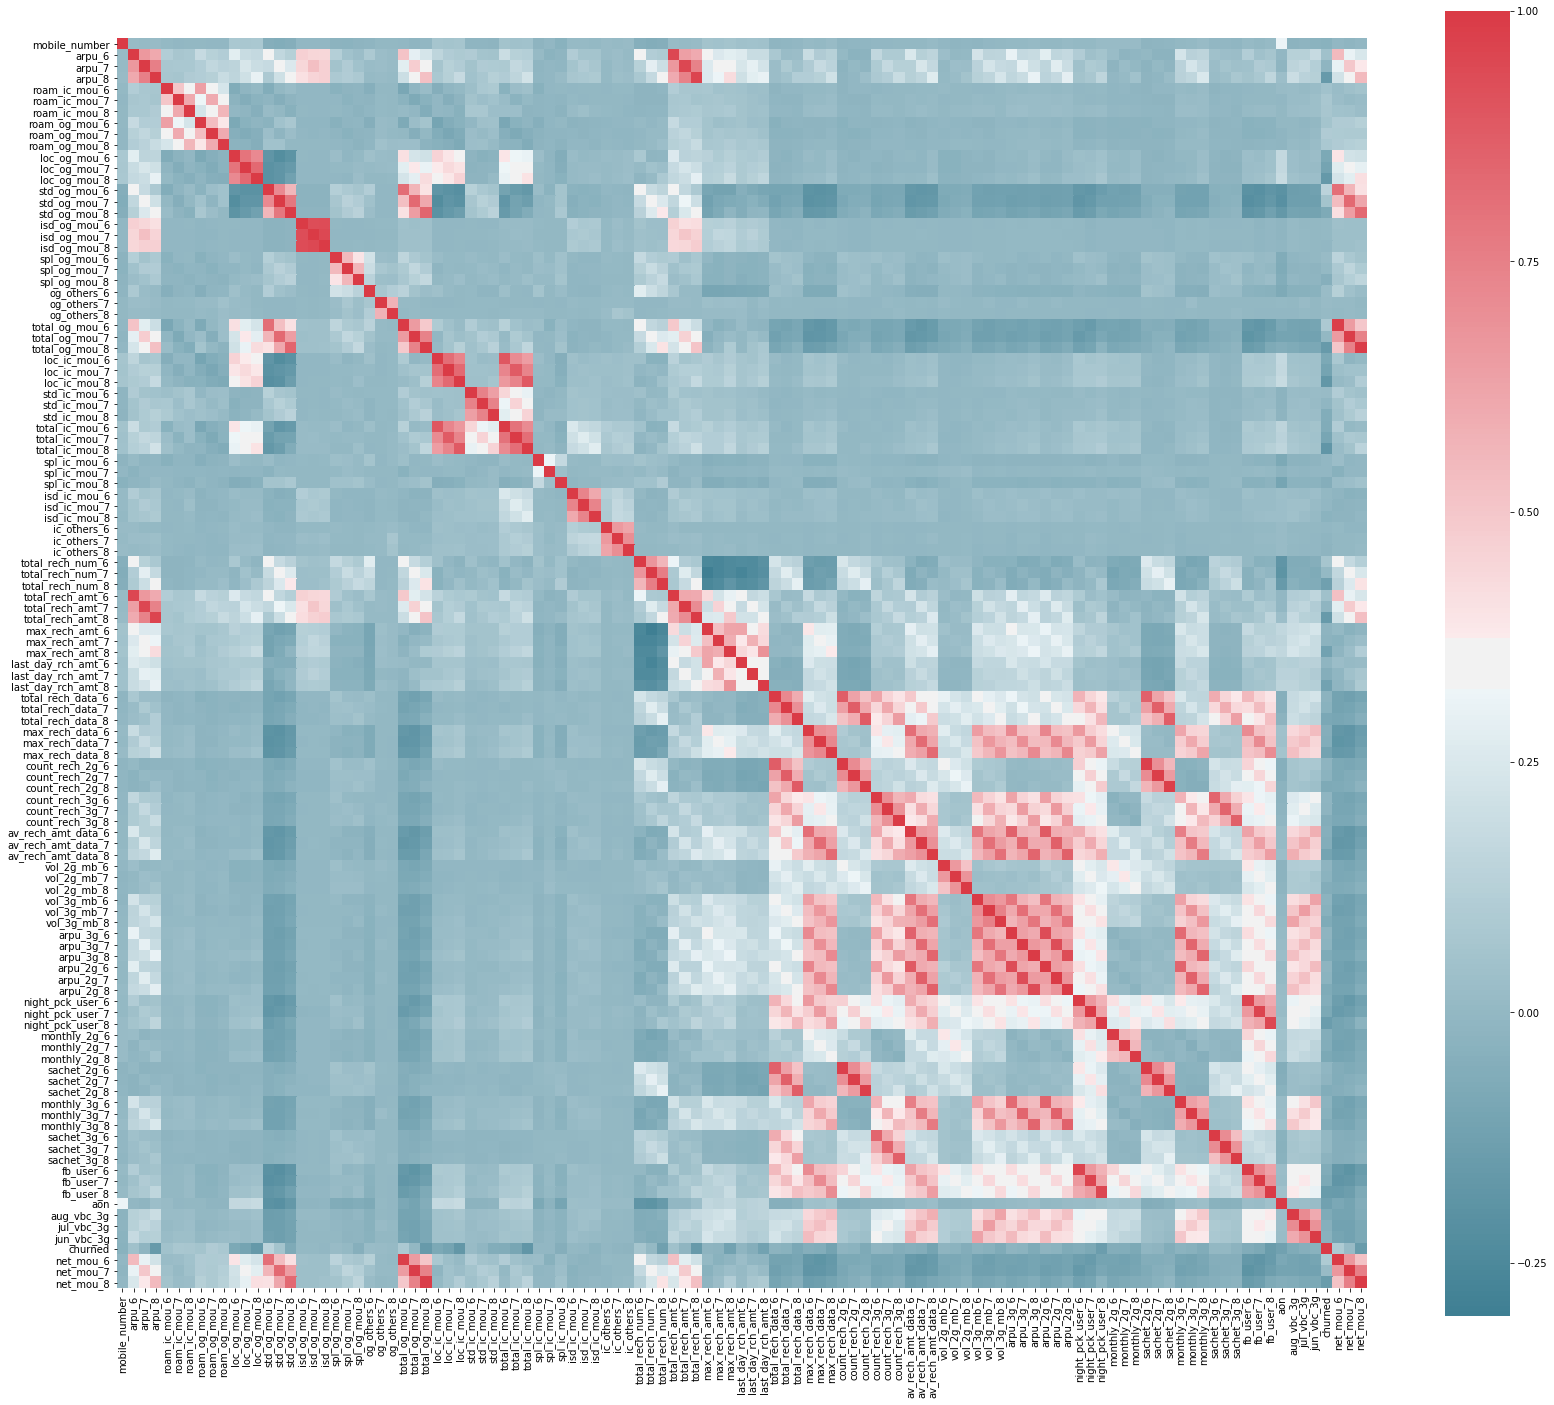

In [96]:
f, ax = plt.subplots(figsize=(28, 24))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


In [97]:
# To a large extent, we seem to have got rid of the columns having high levels of correlation, though some seem
# to be around. We also still have a huge number of columns remaining and some will need to be eliminated

# We can now rely on PCA for helping with dimensionality reduction

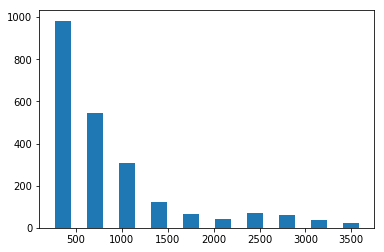

In [98]:
# Plot on Age on Network with the churned customers

plt.hist(churn[churn['churned'] == 1]['aon'], rwidth = 0.5)
plt.show()

** Observation**: This histogram seems to suggest that most of customers that churned have stayed with the network for very few days as opposed to loyal customers. As many as 3500 customers have been with the network for barely 200 days or lesser

The maximum number of days a churned customer has been with the network is a little over 800 days where as a loyal customer customer has been around for nearly 8000 days

longer time ==> lower churn

To prevent customers from churning, there can be promotional offers provided based on the age on network

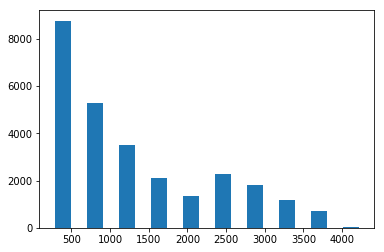

In [99]:
plt.hist(churn[churn['churned'] == 0]['aon'], rwidth = 0.5)
plt.show()

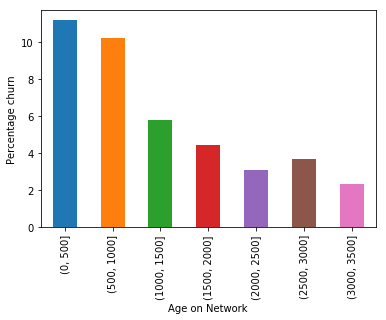

In [100]:
# We notice that the highest churn percentage is with the shortest duration customers

bins = range(0,4000,500)
fig, ax = plt.subplots()
fig.canvas.draw()

ymarks=[i for i in range(0,20,2)]
ax.set_yticklabels(ymarks)
churn.groupby(pd.cut(churn['aon'], bins=bins)).churned.mean().plot(kind = 'bar')
plt.ylabel('Percentage churn')
plt.xlabel('Age on Network')
plt.show()

** Observation **: Customers are most uncertain during the initial phase. Once they are over the first year, the rate of churn drops steadily which could be indicative of the level of satisfaction of the customer with the service provider

In [101]:
# churn.info()

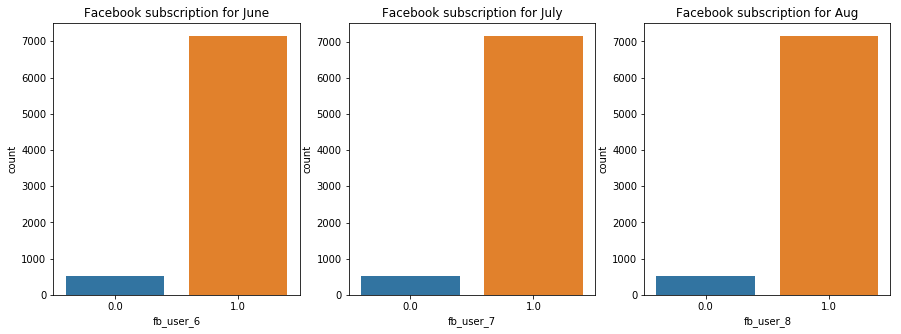

In [102]:
# Pattern on the Facebook service users on the Churners

fb = churn[['fb_user_6', 'fb_user_7', 'fb_user_8', 'churned']]

fb = fb.loc[(fb['fb_user_6'] != -1) & (fb['fb_user_7'] != -1) & (fb['fb_user_8'] != -1)]

plt.figure(figsize = (15,5))

plt.subplot(131)
sns.countplot(x = fb.fb_user_6)
plt.title('Facebook subscription for June')
plt.subplot(132)
sns.countplot(x = fb.fb_user_7)
plt.title('Facebook subscription for July')
plt.subplot(133)
sns.countplot(x = fb.fb_user_8)
plt.title('Facebook subscription for Aug')
plt.show()

** Observation **: There are very few customers who did not opt for this service in the month of Aug. There is not much significant change.

In [103]:
# # Pattern on the volume based cost

vbc = pd.melt(churn[['mobile_number', 'churned', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

vbc.head()

,mobile_number,churned,variable,total
0,7000701601,1,jun_vbc_3g,18.74
1,7001524846,0,jun_vbc_3g,122.16
2,7002191713,0,jun_vbc_3g,0.00
3,7000875565,0,jun_vbc_3g,21.89
4,7000187447,0,jun_vbc_3g,0.00


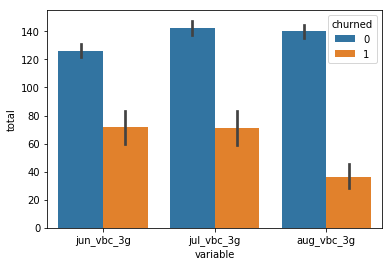

In [104]:
# We see a declining pattern for churners

sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = vbc)
plt.show()

** Observation **: The customers who churned declined this service in Aug

In [105]:
# Drop the data frame

del vbc

In [106]:
# # Plot to see the pattern with the data service schemes taken month on month

# sachet_3g = pd.melt(churn[['mobile_number', 'churned', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

# sachet_3g.head()

In [107]:
# # There is a decline in the pattern for the churners

# sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = sachet_3g)
# plt.show()

** Observation **: The customers who churned declined this service in Aug

In [108]:
# # Plot to see the pattern with the data service schemes taken month on month

# sachet_2g = pd.melt(churn[['mobile_number', 'churned', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total_mou' )

# sachet_2g.head()

In [109]:
# # We see a decline in the service scheme taken for Churners

# sns.barplot(x = 'variable', y = 'total_mou', hue = 'churned', data = sachet_2g)
# plt.show()

** Observation **: Lot of customers who Churned declined this service in august

In [110]:
# # Number of 3G recharges trend month on month with Churners and Non Churners

# count_rech_3g = pd.melt(churn[['mobile_number', 'churned', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

# count_rech_3g.head()

In [111]:
# # There is a decline in Charging with Churners. 

# sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = count_rech_3g)
# plt.show()

** Observation **: Customers who churned declined usage of this 3G services in Aug month

In [112]:
# # Number of 2G recharges trend month on month with Churners and Non Churners

# count_rech_2g = pd.melt(churn[['mobile_number', 'churned', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8']], id_vars = ['mobile_number', 'churned'], value_name = 'total' )

# count_rech_2g.head()

In [113]:
# # There is a decline in Charging with Churners. 

# sns.barplot(x = 'variable', y = 'total', hue = 'churned', data = count_rech_2g)
# plt.show()

** Observation ** : Customers who churned declined usage of this 2G services in Aug month

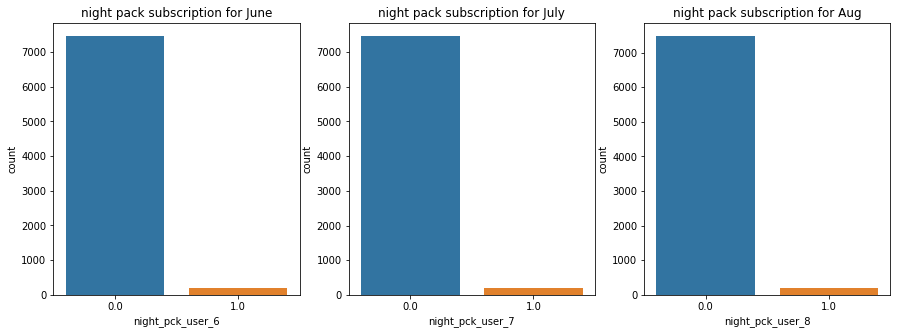

In [114]:
# Observe the Night Service Pack subscriptions column info

# Plot to show the number of subscribers for Night Pack Service

ns = churn[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'churned']]

ns = ns.loc[(ns['night_pck_user_6'] != -1) & (ns['night_pck_user_7'] != -1) & (ns['night_pck_user_8'] != -1)]

plt.figure(figsize = (15,5))

plt.subplot(131)
sns.countplot(x = ns.night_pck_user_6)
plt.title('night pack subscription for June')
plt.subplot(132)
sns.countplot(x = ns.night_pck_user_7)
plt.title('night pack subscription for July')
plt.subplot(133)
sns.countplot(x = ns.night_pck_user_8)
plt.title('night pack subscription for Aug')
plt.show()

** Observation **: There seems to be no significant changes with respect to subscriptions to this service.

In [115]:
churn.shape

(29285, 114)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


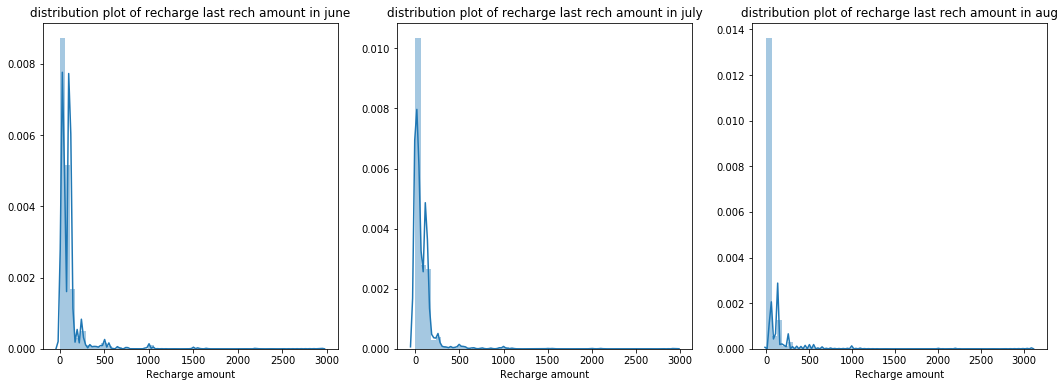

In [116]:
# Distribution of last Recharge Amount

df = churn.loc[churn['churned']==1]

plt.figure(figsize = (18,6))
plt.subplot(131)
sns.distplot(df['last_day_rch_amt_6'])
plt.xlabel('Recharge amount')
plt.title('distribution plot of recharge last rech amount in june')
plt.subplot(132)
plt.title('distribution plot of recharge last rech amount in july')
sns.distplot(df['last_day_rch_amt_7'])
plt.xlabel('Recharge amount')
plt.subplot(133)
sns.distplot(df['last_day_rch_amt_8'])
plt.xlabel('Recharge amount')
plt.title('distribution plot of recharge last rech amount in aug')
plt.show()

** Observation **: denisty of people who recharged in lower recharge amounts have reduced in the month of august

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x360 with 0 Axes>

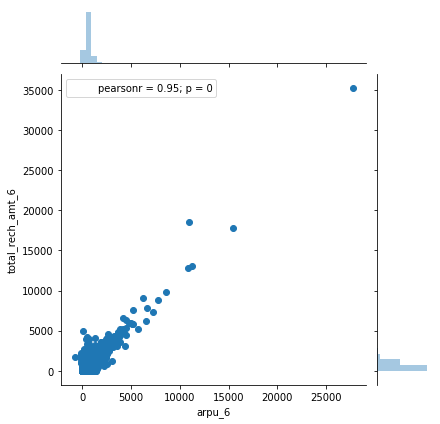

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


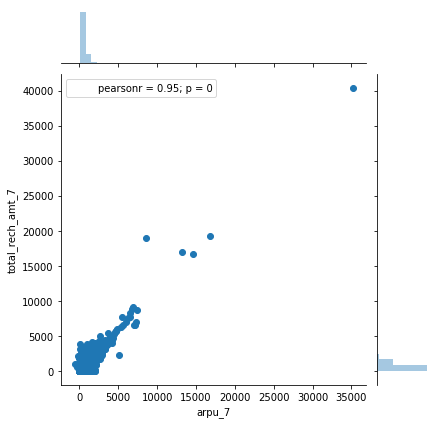

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


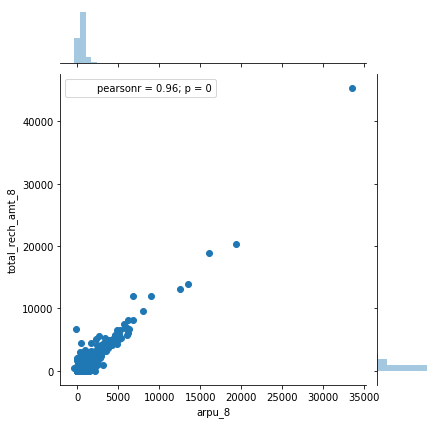

In [117]:
# Relation between ARPU and the total recharge amounts

plt.figure(figsize = (15,5))
sns.jointplot('arpu_6','total_rech_amt_6', data = churn)
plt.show()
sns.jointplot('arpu_7','total_rech_amt_7', data = churn)
plt.show()
sns.jointplot('arpu_8','total_rech_amt_8', data = churn)
plt.show()

** Observation **: The ARPU and Total Recharge amts are linearly related. Alongside we see outliers

In [118]:
# Current dataset

churn.shape

(29285, 114)

### ** Derived Column **: 'is_voice'

We can derive a column 'is_voice' which says if the customer is a Voice User only or Voice and Data User. With this we can find if the churners are more with the Voice Users or Voice and Data Users

In [119]:
# Create new column 'is_voice' to capture information as to if the customer is Voice User only or Voice and Data User

churn['is_voice'] = ((churn['vol_2g_mb_6']+churn['vol_2g_mb_7']+churn['vol_2g_mb_8']+churn['vol_3g_mb_6']+churn['vol_3g_mb_7']+churn['vol_3g_mb_8'])==0)
churn['is_voice'] = churn['is_voice'].map({True: 1,False : 0})


In [120]:
churn['is_voice'].value_counts()

1    15728
0    13557
Name: is_voice, dtype: int64

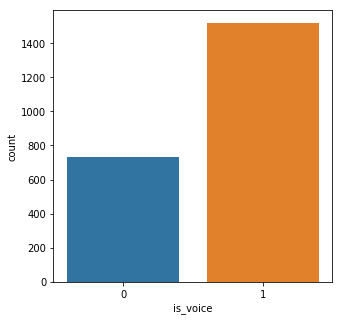

In [121]:
# Find the Churners ratio

df = churn.loc[churn['churned']==1]

plt.figure(figsize=(5,5))
sns.countplot(x=(df['is_voice']) )
plt.show()


** Observation **: We see that Customers using just the Voice service tend to Churn. We may possibly infer that customers who use more than one service tend to be loyal

In [122]:
churn.shape

(29285, 115)

### ** Derived Columns - The last Recharge date variables ** : Convert the date to the day of recharge and drop the date columns

In [123]:
from datetime import datetime

def f(x):
    dt_str = x['date_of_last_rech_6']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
churn['rech_day_6'] = churn.apply(f, axis=1)

def f(x):
    dt_str = x['date_of_last_rech_7']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
churn['rech_day_7'] = churn.apply(f, axis=1)

def f(x):
    dt_str = x['date_of_last_rech_8']
    dt_obj = datetime.strptime(dt_str, '%m/%d/%Y')
    return(dt_obj.day)
churn['rech_day_8'] = churn.apply(f, axis=1)

In [124]:
# Drop the date columns

churn.drop(['date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [125]:
churn.shape

(29285, 115)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Raghavendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


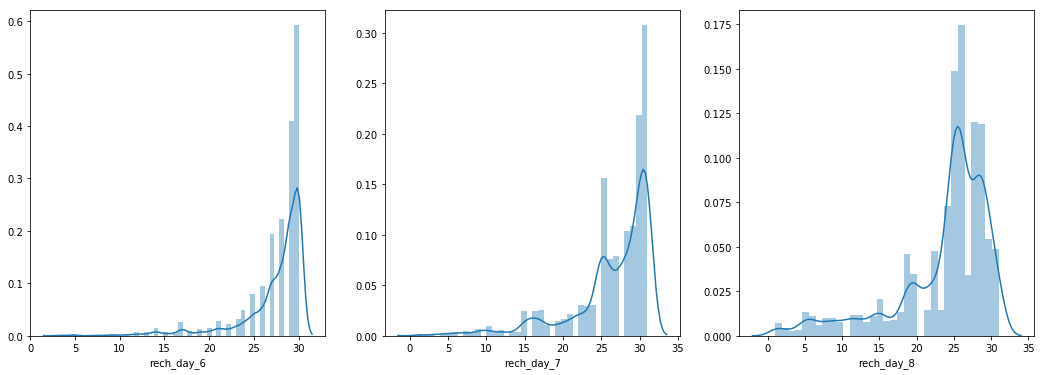

In [126]:
# Recharge days distribution

date_churned = churn.loc[churn['churned']==1]

plt.figure(figsize = (18,6))
plt.subplot(131)
sns.distplot(date_churned['rech_day_6'])
plt.subplot(132)
sns.distplot(date_churned['rech_day_7'])
plt.subplot(133)
sns.distplot(date_churned['rech_day_8'])
plt.show()

** Observation **: There is a certain pattern difference from 6th to 8th month

### Check the churn rate

In [127]:
((churn['churned'].value_counts())/len(churn.index))*100

0    92.310056
1     7.689944
Name: churned, dtype: float64

In [128]:
churn_backup = churn.copy()

In [129]:
# Identify all the columns that are categorical in nature with less than a certain number of distinct values, 6 here
churn_categorical = []
num_distinct_vals = 3 # Can be changed if essential

for column_name in churn.columns:
    if churn[column_name].nunique() <= num_distinct_vals and column_name != 'churned':
        churn_categorical.append(column_name)
        
        
print(churn_categorical)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'is_voice']


In [130]:
# The individual values for each of the categorical columns need to be replaced with the churn rate that is churns/non churns
# associated with them before applying PCA

In [131]:
# Before applying the logic

In [132]:
churn[churn_categorical].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,is_voice
7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
8,-1.0,0.0,0.0,-1.0,1.0,1.0,0
13,-1.0,-1.0,0.0,-1.0,-1.0,1.0,0
16,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
17,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


In [133]:
# Retain only one set of code here

In [134]:
# Set-1

#for column_name in churn_categorical:
#    df = churn.groupby(column_name)['churned'].mean()
#    df = df.reset_index()
#    df.columns = ['column_value', 'churn_pct']

#    for index, row in df.iterrows():
#        churn.loc[churn[column_name] == row['column_value'], column_name] = row['churn_pct']

In [135]:
# After applying the logic

In [136]:
# Lets take a temp dataframe of churn to use for the read only purpose
temp = churn.copy()

In [137]:
# Calculate and enter the categorical values to their respective churns/non-churns

# Set-2

for col in churn_categorical:
    for cat in temp[col].unique():
        cat_churn_rate =((float(len((temp.loc[(temp['churned'] == 1) & (temp[col] == cat)]).index)))/
                         (float(len(temp.loc[temp[col] == cat]))))
        churn.loc[churn[col] == cat, col] = cat_churn_rate

In [138]:
churn[churn_categorical].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,is_voice
7,0.089888,0.094452,0.108504,0.089888,0.094452,0.108504,0.096516
8,0.089888,0.049742,0.029610,0.089888,0.048176,0.023320,0.054142
13,0.089888,0.094452,0.029610,0.089888,0.094452,0.023320,0.054142
16,0.089888,0.094452,0.108504,0.089888,0.094452,0.108504,0.096516
17,0.089888,0.094452,0.108504,0.089888,0.094452,0.108504,0.096516


### EDA Findings ###############################################################

#### 1. ARPU (Average Revenue per User) is mostly in range of 0-2000
#### 2. There are many fairly new customers compared to long time customers
#### 3. Churners are relatively fewer among the long time customers and are loyal 
#### 4. There are extereme outliers in data, but getting rid of them will amount to loss of data
#### 5. A number of metrics such as ARPU, minutes of usage, net usage show a significant decline among churners as opposed to non churners
#### 6. Most churners are recent customers, longer time ==> lower churn . By providing promotional offers, recent customers may be retained
#### 7. Customers are most uncertain during the initial phase. Once they are over the first year, the rate of churn drops steadily which could be indicative of the level of satisfaction of the customer with the service provider
#### 8. We see that Customers using just the Voice service tend to Churn. We may possibly infer that customers who use more than one service tend to be loyal

## ** Exploratory Data Analysis **is completed and we proceed for Classification Model Generation

## ** Model building **

** Observation **: We have seen in the EDA phase that there are lot of correlated variables. 
There are more than 100 variables in the dataset. 
Lets carry out PCA and identify Principal Analysis Components to handle the dimensionality reduction. It also addresses correlation.

### Splitting the Data into training and test dataset

In [139]:
# Putting feature variables to X
X = churn.drop(['mobile_number','churned'],axis=1)

# Putting response variable to y
y = churn['churned']

### Feature Standardisation

In [140]:
# Scaling the data

standard_scaler = StandardScaler()

In [141]:
X = pd.DataFrame(standard_scaler.fit_transform(X), columns = X.columns)

In [142]:
X.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,net_mou_6,net_mou_7,net_mou_8,is_voice,rech_day_6,rech_day_7,rech_day_8
0,1.115068,1.634121,5.342446,-0.015216,0.258381,0.240253,-0.046536,-0.098523,0.150819,0.367134,...,-0.188485,-0.285664,-0.264085,-0.308826,-0.163517,-0.398376,0.928421,0.027228,-0.621950,-0.180747
1,-0.478344,-0.219965,-0.825275,-0.220478,-0.178252,-0.179251,-0.247507,-0.226071,-0.203595,0.251026,...,-0.281529,1.881825,0.000395,-0.313276,-0.441647,-0.699076,-1.077097,-0.454430,0.802896,0.607133
2,-0.214971,-0.839456,0.101469,0.077108,1.702306,0.776831,-0.179953,0.131144,-0.190186,-0.204185,...,-0.334831,-0.332795,-0.312009,0.306497,-0.739974,0.530761,-1.077097,-1.658577,-1.334373,0.607133
3,-0.357755,-0.635811,-0.722554,-0.220478,-0.141355,-0.179251,-0.247507,-0.046349,-0.203595,0.087205,...,-0.334831,-0.326837,-0.256029,-0.559451,-0.628710,-0.609130,0.928421,0.749716,0.802896,-2.544386
4,0.240031,-1.243059,-1.052669,-0.220478,-0.116192,-0.115476,-0.247507,-0.140364,-0.079373,-0.488120,...,-0.334831,-0.332795,-0.312009,0.813141,-1.059360,-0.929330,0.928421,0.749716,0.565422,-0.377717


### Splitting Data into Training and Test Sets¶

In [143]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [144]:
# Since there is class imbalance, SMOTE technique is used for sythetic sampling

In [145]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1594
Before OverSampling, counts of label '0': 18905 



### Carry out oversampling to handle the class imbalance using SMOTE

** Important **: Please note that the oversampling would be applied only on the training data. Predictions on the test data will be carried out without any manipulation. This is to ensure that the algorithms are not mislead in anyway

In [146]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [147]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [148]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (37810, 113)
After OverSampling, the shape of train_y: (37810,) 



In [149]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 18905
After OverSampling, counts of label '0': 18905


** Inference ** : As can be noticed from the above the percentage of churners is now more skewed, but by applying SMOTE technique for oversampling, the percentage is equal between churners and non churners thus handling class imbalance causing incorrect predictions

In [150]:
# Renaming the datsets
# Here X_train and y_train are given the values from the SMOTE (Oversampling) technique

X_train_non_pca = X_train.copy()
y_train_non_pca = y_train.copy()

X_train = X_train_res
y_train = y_train_res

In [151]:
X_train.shape

(37810, 113)

In [152]:
y_train.shape

(37810,)

In [153]:
# If you wish to not use the SMOTE data. Restore the NON SMOTE data. This is commented. 
# Uncomment only when required

# X_train = X_train_non_pca.copy()
# y_train = y_train_non_pca.copy()

** Step 1: ** Carry out over-sampling to address class imbalance

** Step 2: ** Implement PCA to achieve dimensionality reduction

** Step 3: ** Apply various ML algorithms to identify the one with highest recall percentage

## PCA on Data


In [154]:
X_train.shape

(37810, 113)

In [155]:
# Carry out PCA for dimensionality reduction

pca = PCA(svd_solver='randomized', random_state=42)

In [156]:
#Doing the PCA on the train data after carrying out over sampling

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them


In [157]:
pca.components_

array([[ 3.84501471e-02,  6.54547046e-02,  7.72026645e-02, ...,
        -4.49452000e-02,  1.61479175e-03,  8.36711913e-03],
       [ 2.12622065e-01,  2.69407613e-01,  2.35708559e-01, ...,
         4.01824965e-02,  7.69249666e-02,  6.31264516e-02],
       [-2.21673695e-02, -2.81898893e-02, -3.47519810e-02, ...,
         1.11821134e-01,  1.08991143e-01,  7.51499121e-02],
       ...,
       [-0.00000000e+00, -3.14935825e-16,  2.60554418e-16, ...,
        -4.26093950e-17,  8.22823713e-17,  2.43285103e-17],
       [ 0.00000000e+00, -1.18329294e-16,  3.56521778e-16, ...,
         7.51945086e-17, -5.16143821e-17, -4.82668945e-17],
       [ 0.00000000e+00, -4.03658616e-17, -2.88586227e-16, ...,
        -9.76762643e-17, -7.30609611e-18, -6.29729381e-17]])

In [158]:
colnames = list(X_train_non_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(113)

,PC1,PC2,Feature
0,0.038450,0.212622,arpu_6
1,0.065455,0.269408,arpu_7
2,0.077203,0.235709,arpu_8
3,0.001631,0.041840,roam_ic_mou_6
4,0.000345,0.038218,roam_ic_mou_7
5,0.002377,0.050343,roam_ic_mou_8
6,-0.005906,0.055896,roam_og_mou_6
7,-0.009593,0.074922,roam_og_mou_7
8,-0.000145,0.093438,roam_og_mou_8
9,0.021444,0.076969,loc_og_mou_6


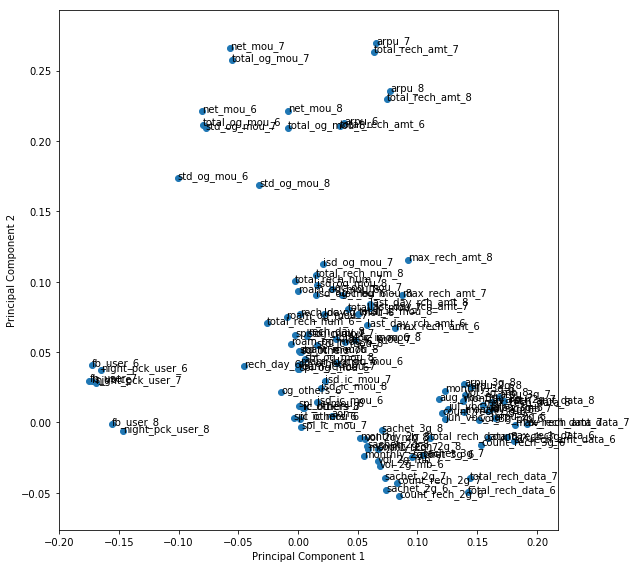

In [159]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [160]:
pca.explained_variance_ratio_

array([1.53091040e-01, 8.85673835e-02, 7.07563018e-02, 5.37037119e-02,
       5.06844671e-02, 4.12594460e-02, 3.59936620e-02, 3.41275168e-02,
       3.36813670e-02, 2.39873418e-02, 2.29628773e-02, 1.99675428e-02,
       1.88644962e-02, 1.88086079e-02, 1.70506210e-02, 1.62613507e-02,
       1.33169009e-02, 1.22003020e-02, 1.20037852e-02, 1.14868752e-02,
       1.10452527e-02, 1.06216035e-02, 1.05377360e-02, 9.97265524e-03,
       9.72354883e-03, 9.42540172e-03, 9.17797537e-03, 8.42586248e-03,
       7.66075054e-03, 7.45235460e-03, 7.24992721e-03, 7.04404204e-03,
       6.56193905e-03, 6.28278448e-03, 6.19521796e-03, 5.99992943e-03,
       5.81702759e-03, 5.53753778e-03, 5.28155383e-03, 5.03893783e-03,
       4.96014854e-03, 4.66842768e-03, 4.20792922e-03, 3.83448921e-03,
       3.55262247e-03, 3.46408633e-03, 3.33101284e-03, 3.28688371e-03,
       3.11297363e-03, 3.07494459e-03, 3.03077827e-03, 2.90949173e-03,
       2.87343448e-03, 2.73092177e-03, 2.70993946e-03, 2.60381029e-03,
      

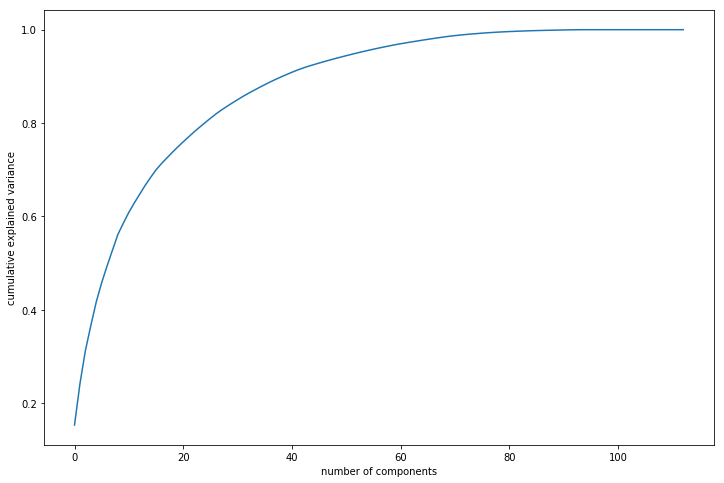

In [161]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the graph it looks like 45 components are enough to describe 90% of the variance in the dataset
We'll choose 45 components for our modeling.
#### Lets check how many are required from the PCA module

In [162]:
# Invoke PCA for the required variance. If you need a different variance change it here.

pca_final = PCA(0.90)


#### Basis transformation - getting the data onto our PCs

In [163]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(37810, 40)

### ** Observation **: Note the reduction in dimensionality. We will be considering only 40 dimensions now for 90% variance.

#### Confirm to see that PCA transformed data is not correlated

In [164]:
#creating correlation matrix for the data

corrmat = np.corrcoef(df_train_pca.transpose())

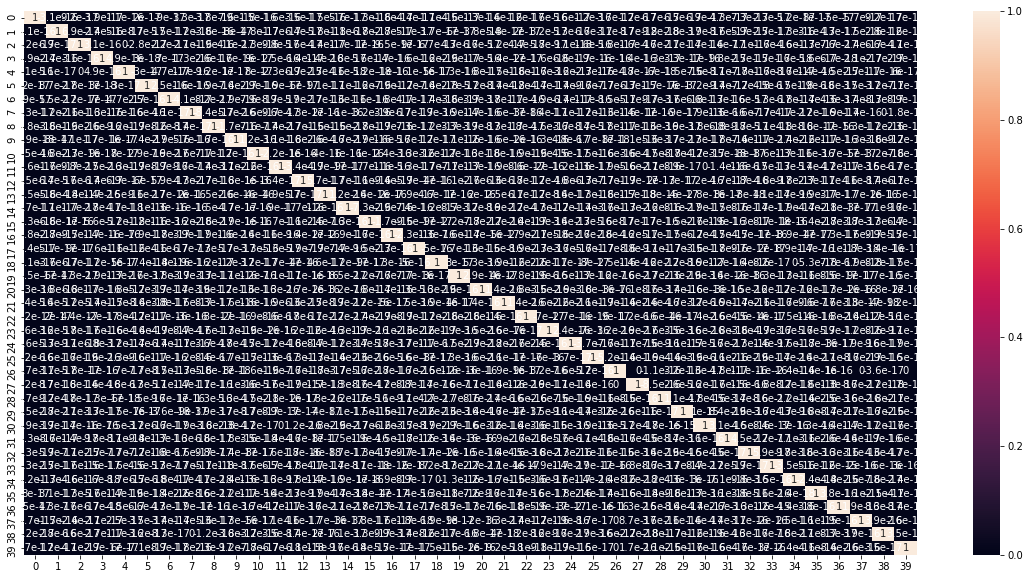

In [165]:
# Plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [166]:
# 1s -> 0s in diagonals

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 1.175547832159502e-15 , min corr:  -1.1372863407705633e-15


** Observation **: We see that correlations are indeed very close to 0.
We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [167]:
#Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8786, 40)

In [168]:
# Adding the following lines of code to tabulate results from the various algos, compare and contrast to determine
# the best performing algorithm to identify the churners

In [169]:
model_results = pd.DataFrame([['Logistic Regression', 0, 0, 0, 0], ['SVM', 0, 0, 0, 0], ['Decision Tree', 0, 0, 0, 0], ['Random Forests', 0, 0, 0, 0], ['Ada Boost', 0, 0, 0, 0]], columns = ['Algorithm', 'Accuracy', 'Recall', 'Precision', 'AUC'])


# Part 1: Build Model to Predict Customers who will Churn

### We will be evaluating the Sensitivity of the Model to know the Churners Predictive Power. Sensitivity metric in sklearn is Recall.

### Oversampling has been carried out to handle the class imbalance associated with churn percentage

# ** Method 1 : **  Building Logistic Regression Model with the PCA Data 

In [170]:
#performing logistic regression on the transformed data

lr_pca = LogisticRegression()

#fitting the model with transformed training data
lr_pca.fit(df_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
#predicting on the test data using the model
# we will convert the prediction into a dataframe so that further analysis can be done 
y_pred_pca = pd.DataFrame(lr_pca.predict_proba(df_test_pca)).iloc[:,[1]]
y_pred_pca.head()

,1
0,0.613742
1,0.005147
2,0.042294
3,0.008311
4,0.303204


In [172]:
#renaming the columns
y_pred_pca.rename(columns = {1 : 'pca_churn_prob'}, inplace = True)
y_pred_pca.head()

,pca_churn_prob
0,0.613742
1,0.005147
2,0.042294
3,0.008311
4,0.303204


In [173]:
y_test_df = pd.DataFrame(y_test)
y_test_df['pr_index'] = y_test_df.index
y_test_df.reset_index(inplace=True, drop = True)
y_test_df.head()

,churned,pr_index
0,0,92993
1,0,57475
2,0,21466
3,0,34070
4,0,75765


In [174]:
#y_test structure
y_test.head()

92993    0
57475    0
21466    0
34070    0
75765    0
Name: churned, dtype: int64

In [175]:
#concat of y_test and y_pred_pca
y_pca_result = pd.concat([y_test_df, y_pred_pca], axis =1)
y_pca_result = y_pca_result.reindex_axis(['pr_index', 'churned', 'pca_churn_prob'], axis =1)
y_pca_result.head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,pr_index,churned,pca_churn_prob
0,92993,0,0.613742
1,57475,0,0.005147
2,21466,0,0.042294
3,34070,0,0.008311
4,75765,0,0.303204


In [176]:
num = [float(x)/10 for x in range(10)]

for i in num:
    y_pca_result[i] = y_pca_result['pca_churn_prob'].apply(lambda x: 1 if x > i else 0)
    
y_pca_result.sample(10)

,pr_index,churned,pca_churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6065,4640,0,0.102010,1,1,0,0,0,0,0,0,0,0
1774,31105,0,0.024915,1,0,0,0,0,0,0,0,0,0
7766,2774,0,0.439953,1,1,1,1,1,0,0,0,0,0
6279,68619,0,0.316259,1,1,1,1,0,0,0,0,0,0
2259,95702,0,0.640326,1,1,1,1,1,1,1,0,0,0
2918,67253,0,0.253967,1,1,1,0,0,0,0,0,0,0
434,42698,0,0.099946,1,0,0,0,0,0,0,0,0,0
2745,80563,0,0.982594,1,1,1,1,1,1,1,1,1,1
5025,48360,0,0.010681,1,0,0,0,0,0,0,0,0,0
4069,54229,0,0.305576,1,1,1,1,0,0,0,0,0,0


In [177]:
# creating a dataframe with accuracy, sensitivity and specificity
pca_results = pd.DataFrame(columns = ['pca_churn_prob', 'accuracy', 'sensitivity', 'specificity'])

for i in num:
    cm1 = metrics.confusion_matrix(y_pca_result['churned'], y_pca_result[i])
    accuracy = metrics.accuracy_score(y_pca_result['churned'], y_pca_result[i])
    sensitivity = cm1[0,0]/float(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/float(cm1[1,1]+cm1[1,0])
    
    pca_results.loc[i] = [i, accuracy, sensitivity, specificity]
pca_results

,pca_churn_prob,accuracy,sensitivity,specificity
0.0,0.0,0.074892,0.000000,1.000000
0.1,0.1,0.402572,0.356791,0.968085
0.2,0.2,0.559868,0.529158,0.939210
0.3,0.3,0.673344,0.654405,0.907295
0.4,0.4,0.758479,0.748770,0.878419
0.5,0.5,0.828477,0.826895,0.848024
0.6,0.6,0.872069,0.878937,0.787234
0.7,0.7,0.900637,0.914985,0.723404
0.8,0.8,0.920783,0.948327,0.580547
0.9,0.9,0.927840,0.977854,0.310030


Text(0.5,1,'plot to find optimal cutoff after pca')

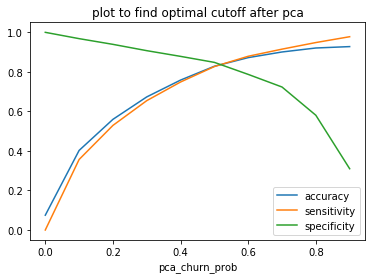

In [178]:
#plot to find the optimal cutoff
pca_results.plot.line(x = 'pca_churn_prob',y = ['accuracy','sensitivity','specificity'])
plt.title('plot to find optimal cutoff after pca')

**Inference**: based on the plots above, we set the cutoff as 0.5

### Final - Logistic Regression Model with cutoff as 0.5

In [179]:
pca_results.loc[pca_results['pca_churn_prob'] == 0.5]

,pca_churn_prob,accuracy,sensitivity,specificity
0.5,0.5,0.828477,0.826895,0.848024


In [180]:
y_test_final = y_test_df.drop('pr_index', axis =1)

In [181]:
#findin the area under the curve
y_pred_final = lr_pca.predict_proba(df_test_pca)[:,1]
print(metrics.roc_auc_score(y_test_final,y_pred_final))

0.8934747310509059


In [182]:
#confusion matrix after PCA
cm = metrics.confusion_matrix(y_test_final, y_pca_result[0.5])
cm

array([[6721, 1407],
       [ 100,  558]], dtype=int64)

In [183]:
metrics.accuracy_score(y_test_final, y_pca_result[0.5])

0.8284771226951969

In [184]:
metrics.recall_score(y_test_final, y_pca_result[0.5])

0.8480243161094225

** Inference **: By applying logistic regression, the recall percentage obtained is 84.8%

In [185]:
# By applying SMOTE on the training data, we were able to improve the percentage of churners 

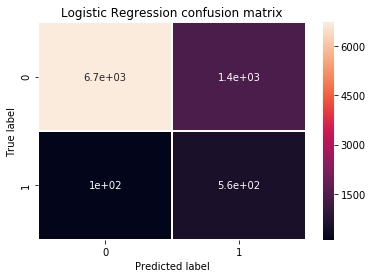

In [186]:
sns.heatmap(cm, annot = True,  linewidths=.5)
plt.title('Logistic Regression confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

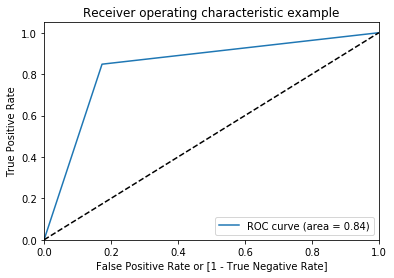

(array([0.        , 0.17310531, 1.        ]),
 array([0.        , 0.84802432, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [188]:
draw_roc(y_test_final, y_pca_result[0.5])

### ** Observation ** : We consider the Senvitivity Metric in order to know the percentage of Churners and it is fairly good with 84.8 %

In [189]:
# Updating the results in the model_results dataframe to enable comparison

In [190]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'Accuracy'] = metrics.accuracy_score(y_test_final, y_pca_result[0.5]) * 100 

In [191]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'Recall'] = metrics.recall_score(y_test_final, y_pca_result[0.5]) * 100

In [192]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'AUC'] = metrics.roc_auc_score(y_test_final, y_pca_result[0.5]) * 100

In [193]:
model_results.loc[model_results['Algorithm'] == 'Logistic Regression', 'Precision'] = metrics.precision_score(y_test_final, y_pca_result[0.5]) * 100

In [194]:
model_results

,Algorithm,Accuracy,Recall,Precision,AUC
0,Logistic Regression,82.847712,84.802432,28.396947,83.74595
1,SVM,0.000000,0.000000,0.000000,0.00000
2,Decision Tree,0.000000,0.000000,0.000000,0.00000
3,Random Forests,0.000000,0.000000,0.000000,0.00000
4,Ada Boost,0.000000,0.000000,0.000000,0.00000


# Method 2 : Building SVM Model

### ** The SVM Model is taking a lot to time to execute. We see a Recall Percentage of less than 50% and is not recommended. Hence this has been commented out**

In [195]:
#model = SVC(C = 10, kernel='rbf')
#model.fit(df_train_pca, y_train)

In [196]:
#y_pred = model.predict(df_test_pca)

In [197]:
# confusion matrix
#metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [198]:
#metrics.recall_score(y_true=y_test, y_pred=y_pred)

** Observation **: Not good Sensitivity with SVC with C=10 and Kernel Radial

### Grid Search to find the optimal hyperparameters 

In [199]:
# creating a KFold object with 3 splits 
#folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
#hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
#                     'C': [1, 10, 100]}]


# specify model
#model = SVC(kernel="rbf")

# set up GridSearchCV()
#model_cv = GridSearchCV(estimator = model, 
#                        param_grid = hyper_params, 
#                        scoring= 'recall', 
#                        cv = folds, 
#                        verbose = 1,
#                        return_train_score=True)      

# fit the model
#model_cv.fit(df_train_pca, y_train)

In [200]:
# cv results
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head()

In [201]:
# converting C to numeric type for plotting on x-axis
#cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
#plt.figure(figsize=(16,6))

# subplot 1/3
#plt.subplot(131)
#gamma_01 = cv_results[cv_results['param_gamma']==0.01]

#plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
#plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
#plt.xlabel('C')
#plt.ylabel('Recall')
#plt.title("Gamma=0.01")
#plt.ylim([0.80, 1])
#plt.legend(['test recall', 'train recall'], loc='upper left')
#plt.xscale('log')

# subplot 2/3
#plt.subplot(132)
#gamma_001 = cv_results[cv_results['param_gamma']==0.001]

#plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
#plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
#plt.xlabel('C')
#plt.ylabel('Recall')
#plt.title("Gamma=0.001")
#plt.ylim([0.80, 1])
#plt.legend(['test recall', 'train recall'], loc='upper left')
#plt.xscale('log')


# subplot 3/3
#plt.subplot(133)
#gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

#plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
#plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
#plt.xlabel('C')
#plt.ylabel('Recall')
#plt.title("Gamma=0.0001")
#plt.ylim([0.80, 1])
#plt.legend(['test recall', 'train recall'], loc='upper left')
#plt.xscale('log')

#plt.show()

In [202]:
# printing the optimal accuracy score and hyperparameters
#best_score = model_cv.best_score_
#best_hyperparams = model_cv.best_params_

#print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [203]:
# Specify optimal hyperparameters
#best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
#model = SVC(C=10, gamma=0.01, kernel="rbf")

#model.fit(df_train_pca, y_train)
#y_pred = model.predict(df_test_pca)

# metrics
#print(metrics.confusion_matrix(y_test, y_pred), "\n")
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))
#print("Precision", metrics.precision_score(y_test, y_pred))
#print("Sensitivity/recall", metrics.recall_score(y_test, y_pred))

** Observation ** : The Sensitivity of the SVC Radial model with the optimal Hyperparameters are 

### SVM - Linear Kernel

In [204]:
#model_linear = SVC(C = 1,kernel="linear")

# fit
#model_linear.fit(df_train_pca, y_train)

# predict
#y_pred = model_linear.predict(df_test_pca)

In [205]:
#metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [206]:
# print other metrics

# accuracy
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
#print("Precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
#print("Recall", metrics.recall_score(y_test, y_pred))

In [207]:
# creating a KFold object with 3 splits 
#folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

# instantiating a model with cost=1
#model_l = SVC(C = 1, kernel="linear")

In [208]:
#cv_results = cross_val_score(model_l, df_train_pca, y_train, cv = folds, scoring = 'recall') 

In [209]:
# Print the Mean Recall obtained from the 3 folds

#print("Mean Recall = {}".format(cv_results.mean()))

In [210]:
# Specify range of parameters (C) as a list
#params = {"C": [0.1, 1, 10, 100, 1000]}

#model_g = SVC(kernel="linear")

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
#model_gs = GridSearchCV(estimator = model_g, param_grid = params, 
#                        scoring= 'recall', 
#                        cv = folds, 
#                        verbose = 1,
#                       return_train_score=True)  

In [211]:
#model_gs.fit(df_train_pca, y_train)

In [212]:
# results of grid search CV
#cv_results = pd.DataFrame(model_gs.cv_results_)
#cv_results

In [213]:
# plot of C versus train and test scores

#plt.figure(figsize=(8, 6))
#plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
#plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
#plt.xlabel('C')
#plt.ylabel('Recall')
#plt.legend(['test recall', 'train recall'], loc='upper left')
#plt.xscale('log')
#plt.show()

In [214]:
#best_score = model_cv.best_score_
#best_C = model_cv.best_params_['C']

#print(" The highest test recall is {0} at C = {1}".format(best_score, best_C))

In [215]:
# model with the best value of C
#model_best = SVC(C=best_C, kernel="linear")

# fit
#model_best.fit(df_train_pca, y_train)

# predict
#y_pred = model_best.predict(df_test_pca)

In [216]:
# metrics
# print other metrics

# accuracy
#print("Accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
#print("Precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
#print("Recall", metrics.recall_score(y_test, y_pred))


** Observation ** : The Sensitivity of the SVC Linear model with the optimal Hyperparameters are 39%

# Method 3 : Decision Tree Algorithm


#### Default Hyperparameters
Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [217]:

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [218]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred = dt.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.79      0.87      8128
          1       0.23      0.77      0.35       658

avg / total       0.92      0.79      0.83      8786



In [219]:
# Printing confusion matrix and accuracy

print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Sensitivity/Recall: ",metrics.recall_score(y_test, y_pred))

[[6425 1703]
 [ 151  507]]
Accuracy:  0.7889824721147279
Sensitivity/Recall:  0.770516717325228


### Observation : The Sensitivity/Recall of the model gives the Churners percentage. Its 77% in the Decision Tree Model with Default Hyperparameters

** The Default Hyperparameters are :
    max_depth=5,
    max_features=None, 
    min_samples_leaf=1, min_samples_split=2. **

### Hyperparameter Tuning in Decision Tree

### Grid Search to Find Optimal Hyperparameters for building the Decision tree Model

### Tuning max_depth

Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

In [220]:

# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20, 2)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
tree1 = GridSearchCV(estimator = dtree, param_grid = parameters, scoring= 'recall',
                    cv=n_folds, verbose =1)
tree1.fit(df_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   31.9s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=1)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


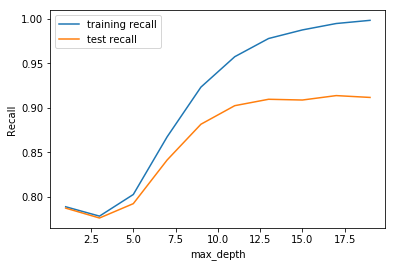

In [221]:
# plotting accuracies with max_depth

scores = tree1.cv_results_

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


** Observation **: Max_Depth of 12-14 seems to be good without overfitting

### Tuning min_samples_leaf

Let's try to find the optimum values for min_samples_leaf and understand how the value of min_samples_leaf affects the decision tree.

In [222]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier()

# fit tree on training data
tree2 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose=1)
tree2.fit(df_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   35.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


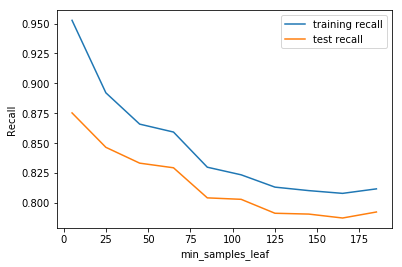

In [223]:
# plotting accuracies with min_samples_leaf

scores = tree2.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Around 10-25 value the test and train score get a good recall

### Tuning min_samples_split
The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [224]:
n_folds = 3

parameters = {'min_samples_split': range(5, 200, 5)}
dtree = DecisionTreeClassifier()

tree3 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose = 1)

tree3.fit(df_train_pca, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


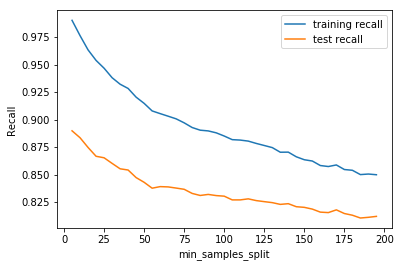

In [225]:
# Plot the results

scores = tree3.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: At around the value of 10-25, the sensitivity is good

### Tuning max_features

In [226]:
n_folds = 3

parameters = {'max_features': range(4,40,4)}
dtree = DecisionTreeClassifier(criterion = "gini",
                              random_state = 100)

tree4 = GridSearchCV(estimator = dtree, param_grid = parameters,
                   cv = n_folds, scoring = "recall", verbose = 1)

tree4.fit(df_train_pca, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(4, 40, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


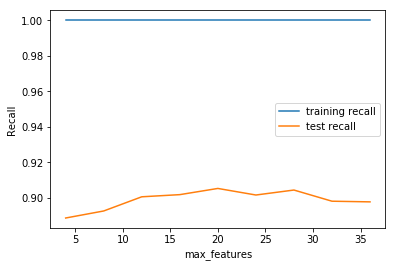

In [227]:
# Plot the results

scores = tree4.cv_results_

plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Max_features 20 takes the highest score on recall with the test data

### GridSearch with all the parameters

** We can now use GridSearchCV to find multiple optimal hyperparameters together. **

In [228]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(12, 16, 2),
    'min_samples_leaf': range(5, 25, 5),
    'min_samples_split': range(5, 25, 5),
    'max_features': [20],
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,scoring='recall',
                           cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  3.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(12, 16, 2), 'min_samples_leaf': range(5, 25, 5), 'min_samples_split': range(5, 25, 5), 'max_features': [20], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [229]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.168835,0.077209,0.006338,1.243072e-03,entropy,12,20,5,5,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.883053,0.893509,0.890346,0.005173,2,0.957867,0.943744,0.946922,0.949511,0.006050
1,1.222867,0.095717,0.006345,4.808116e-04,entropy,12,20,5,10,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.895430,0.906681,0.899127,0.005342,1,0.954138,0.948584,0.953348,0.952023,0.002453
2,1.104457,0.009006,0.005690,4.747809e-04,entropy,12,20,5,15,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.884957,0.883193,0.880402,0.005244,10,0.931286,0.935968,0.935417,0.934224,0.002089
3,1.149672,0.041793,0.006338,1.247787e-03,entropy,12,20,5,20,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.879721,0.880654,0.875271,0.006963,14,0.922558,0.935650,0.930816,0.929675,0.005405
4,1.132134,0.015598,0.006685,4.668209e-04,entropy,12,20,10,5,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.861473,0.885415,0.868765,0.011803,20,0.918829,0.922955,0.933354,0.925046,0.006112
5,1.099113,0.033022,0.006005,4.052337e-07,entropy,12,20,10,10,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.866074,0.871608,0.865327,0.005459,26,0.919226,0.911608,0.912567,0.914467,0.003387
6,1.142816,0.088720,0.006672,4.720447e-04,entropy,12,20,10,15,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.861473,0.869227,0.862841,0.004755,31,0.918591,0.917163,0.918359,0.918038,0.000626
7,1.066095,0.032439,0.006344,4.687197e-04,entropy,12,20,10,20,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.867661,0.885732,0.872256,0.009688,16,0.923193,0.921289,0.924468,0.922983,0.001307
8,1.032399,0.016692,0.005678,9.393527e-04,entropy,12,20,15,5,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.865440,0.862403,0.861201,0.004042,36,0.909307,0.913354,0.904871,0.909178,0.003464
9,1.043747,0.006161,0.007005,8.176054e-04,entropy,12,20,15,10,"{'criterion': 'entropy', 'max_depth': 12, 'max...",...,0.868454,0.855896,0.860936,0.005418,37,0.912481,0.912561,0.897493,0.907512,0.007084


In [230]:
# printing the optimal accuracy score and hyperparameters
print("Best score", grid_search.best_score_)
print(grid_search.best_estimator_)

Best score 0.8991272150224808
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Building the model again with the identified optimal parameters

In [231]:
# model with optimal hyperparameters
dt = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=12, 
                                  max_features =20,
                                  min_samples_leaf=5,
                                  min_samples_split=10)
dt.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [232]:
y_pred = dt.predict(df_test_pca)

In [233]:
# Printing confusion matrix and Sensitivity

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

[[6834 1294]
 [ 229  429]]
0.8266560437058957
0.6519756838905775


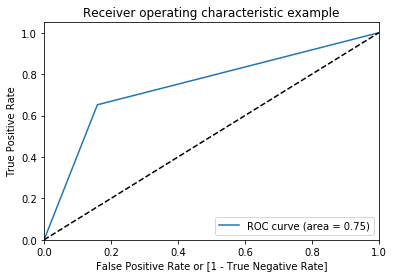

(array([0.        , 0.15920276, 1.        ]),
 array([0.        , 0.65197568, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [234]:
draw_roc(y_test, y_pred)

### Observation: We see that Decision Tree Classifier after Hyperparameter tuning gives result of 65% on identifying Churners as Churners.

In [235]:
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'Accuracy'] = metrics.accuracy_score(y_test,y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'Recall'] = metrics.recall_score(y_test,y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'AUC'] = metrics.roc_auc_score(y_test,y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Decision Tree', 'Precision'] = metrics.precision_score(y_test,y_pred) * 100

In [236]:
model_results

,Algorithm,Accuracy,Recall,Precision,AUC
0,Logistic Regression,82.847712,84.802432,28.396947,83.745950
1,SVM,0.000000,0.000000,0.000000,0.000000
2,Decision Tree,82.665604,65.197568,24.898433,74.638646
3,Random Forests,0.000000,0.000000,0.000000,0.000000
4,Ada Boost,0.000000,0.000000,0.000000,0.000000


# Method 4 : Building Random Forest Model

In [237]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()


# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
# Making predictions
y_pred = rfc.predict(df_test_pca)

In [239]:
# Let's check the report of our default model
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95      8128
          1       0.41      0.50      0.45       658

avg / total       0.92      0.91      0.91      8786



In [240]:
print(accuracy_score(y_test,y_pred))

0.9090598679717733


In [241]:
print(metrics.recall_score(y_test, y_pred))

0.5015197568389058


** Observation ** : The Sensitivity of the Random Forest Model with the default Hyperparameters is 50%. Lets tune the hyperparameters 

### Random Forest Hyperparameters tuning

#### Tuning Max Depth

In [242]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rfc = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [243]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.413294,0.066566,0.016351,0.000467,2,{'max_depth': 2},0.687877,0.760235,0.755912,0.734673,0.033138,4,0.699278,0.760771,0.750476,0.736842,0.026892
1,0.898972,0.014018,0.020033,0.000818,7,{'max_depth': 7},0.834814,0.836877,0.840502,0.837398,0.002351,3,0.859478,0.853527,0.854649,0.855885,0.002582
2,1.298260,0.004201,0.024678,0.000467,12,{'max_depth': 12},0.928911,0.933196,0.934296,0.932134,0.002323,2,0.972388,0.977069,0.975881,0.975112,0.001987
3,2.197900,0.527927,0.036692,0.008661,17,{'max_depth': 17},0.941130,0.948905,0.950167,0.946734,0.003996,1,0.996350,0.997302,0.996826,0.996826,0.000389


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


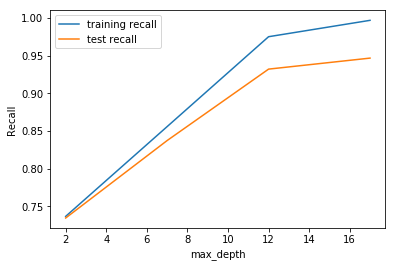

In [244]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Max depth between 12 and 16 seem to provide highest recall

#### Tuning n_estimators

In [245]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}



# instantiate the model (note we are specifying a max_depth)
rfc = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rfc, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [246]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.000261,0.542099,0.122754,0.002358,100,{'n_estimators': 100},0.782450,0.782133,0.802571,0.789051,0.009561,4,0.801000,0.783385,0.797842,0.794076,0.007669
1,27.651278,0.248655,0.627451,0.059441,500,{'n_estimators': 500},0.784672,0.786893,0.795905,0.789156,0.004857,3,0.798619,0.794969,0.790463,0.794684,0.003336
2,50.370131,0.222464,1.139141,0.134216,900,{'n_estimators': 900},0.783719,0.787686,0.798603,0.790003,0.006293,2,0.794890,0.795525,0.795303,0.795239,0.000263
3,72.643280,0.322363,1.526428,0.027341,1300,{'n_estimators': 1300},0.784989,0.788162,0.798127,0.790426,0.005597,1,0.796715,0.797509,0.793875,0.796033,0.001560


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


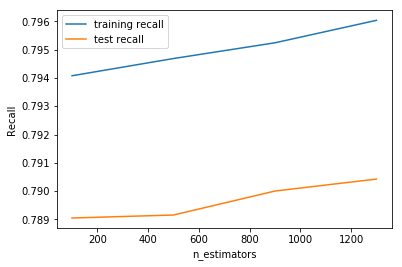

In [247]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Number of estimators around 500 seems to be the most appropriate

#### Tuning Max Features

In [248]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [249]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.459653,0.060585,0.016685,0.002354,4,{'max_features': 4},0.781657,0.776103,0.784003,0.780587,0.003312,4,0.793541,0.779735,0.775785,0.783021,0.007612
1,0.789900,0.082539,0.017679,0.001698,8,{'max_features': 8},0.780705,0.771818,0.800825,0.784449,0.012134,2,0.791478,0.786321,0.796969,0.791589,0.004348
2,1.184173,0.040492,0.015678,0.000472,14,{'max_features': 14},0.778959,0.772453,0.777337,0.776250,0.002765,5,0.794652,0.774498,0.771898,0.780349,0.010169
3,1.808614,0.073684,0.017018,0.001411,20,{'max_features': 20},0.769914,0.789273,0.782733,0.780640,0.008041,3,0.786876,0.794097,0.776182,0.785718,0.007359
4,2.055791,0.181130,0.016018,0.000809,24,{'max_features': 24},0.779911,0.791177,0.785113,0.785401,0.004604,1,0.797032,0.791240,0.778642,0.788971,0.007677


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


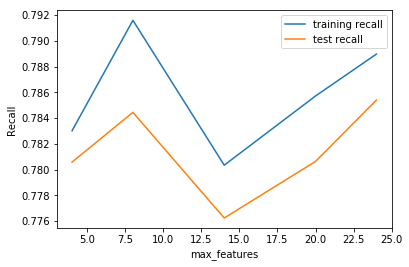

In [250]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Maximum features around 15 seems to make most sense

#### Tuning Min Samples Leaf

In [251]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [252]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.977034,0.029798,0.022015,2.162077e-03,100,{'min_samples_leaf': 100},0.803237,0.823548,0.828599,0.818461,0.010961,1,0.834325,0.838292,0.827912,0.833510,0.004277
1,0.910992,0.056392,0.020008,9.048047e-06,150,{'min_samples_leaf': 150},0.803237,0.803396,0.808602,0.805078,0.002492,2,0.824724,0.811950,0.813472,0.816715,0.005697
2,0.867616,0.012337,0.022015,8.182867e-04,200,{'min_samples_leaf': 200},0.782609,0.797683,0.809395,0.796562,0.010964,3,0.802349,0.808220,0.809029,0.806533,0.002977
3,0.784222,0.019953,0.018355,4.688954e-04,250,{'min_samples_leaf': 250},0.779911,0.790384,0.785748,0.785348,0.004285,4,0.795287,0.797588,0.782133,0.791669,0.006808
4,0.775889,0.036770,0.019014,5.619580e-07,300,{'min_samples_leaf': 300},0.770708,0.792764,0.790986,0.784819,0.010005,5,0.784178,0.800127,0.786020,0.790109,0.007124


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


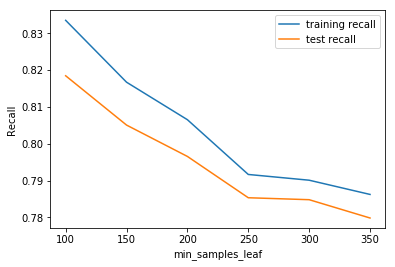

In [253]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Between 100 and 150 for the min_samples_leaf

#### Tuning min_samples_split

In [254]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [255]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.446942,0.083168,0.023350,1.248276e-03,200,{'min_samples_split': 200},0.811330,0.831006,0.844787,0.829040,0.013729,1,0.853368,0.854558,0.857506,0.855144,0.001739
1,1.332568,0.006261,0.022016,3.371748e-07,250,{'min_samples_split': 250},0.811488,0.814345,0.828599,0.818143,0.007484,2,0.842260,0.835039,0.843859,0.840386,0.003837
2,1.205855,0.014730,0.023023,1.410986e-03,300,{'min_samples_split': 300},0.799111,0.813551,0.825107,0.812589,0.010634,3,0.833135,0.826470,0.835052,0.831552,0.003678
3,1.347622,0.107730,0.022357,4.817666e-04,350,{'min_samples_split': 350},0.795303,0.817836,0.805745,0.806295,0.009207,4,0.828295,0.832183,0.812917,0.824465,0.008319
4,1.332926,0.204344,0.022683,3.092902e-03,400,{'min_samples_split': 400},0.787528,0.809902,0.799080,0.798836,0.009136,5,0.811077,0.821550,0.808156,0.813594,0.005751


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


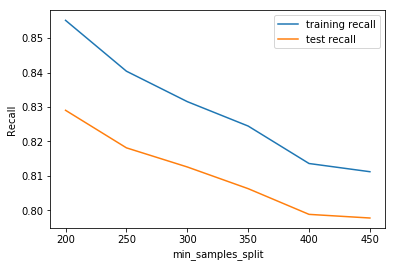

In [256]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation **: Between 200 to 250 for minimum samples split, the recall is high

### Find the Optimal hyperparameters

In [257]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [12],
    'min_samples_leaf': range(100, 150, 25),
    'min_samples_split': range(200, 225, 25),
    'n_estimators': [500], 
    'max_features': [14]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='recall',
                          cv = 3, verbose = 1)



In [258]:
# Fit the grid search to the data - NOTE: Takes 25 mins to execute
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 27.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [12], 'min_samples_leaf': range(100, 150, 25), 'min_samples_split': range(200, 225, 25), 'n_estimators': [500], 'max_features': [14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [259]:
# printing the optimal recall score and hyperparameters
print('We get a score of',grid_search.best_score_,'using',grid_search.best_params_)

We get a score of 0.8291986247024596 using {'criterion': 'entropy', 'max_depth': 12, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 500}


### Fitting the final model with the best parameters obtained from grid search.

In [260]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             criterion='entropy',
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=14,
                             n_estimators=500)

In [261]:
# fit
rfc.fit(df_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [262]:
# predict
y_pred = rfc.predict(df_test_pca)

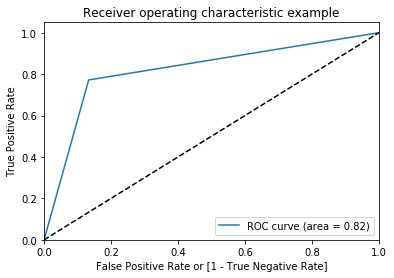

(array([0.        , 0.13324311, 1.        ]),
 array([0.        , 0.77203647, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [263]:
draw_roc(y_test, y_pred)

In [264]:
# Sensitivity
print(metrics.recall_score(y_test,  y_pred))

0.7720364741641338


In [265]:
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'Accuracy'] =  metrics.accuracy_score(y_test, y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'Recall'] =  metrics.recall_score(y_test, y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'AUC'] =  metrics.roc_auc_score(y_test, y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Random Forests', 'Precision'] =  metrics.precision_score(y_test, y_pred) * 100

In [266]:
model_results

,Algorithm,Accuracy,Recall,Precision,AUC
0,Logistic Regression,82.847712,84.802432,28.396947,83.745950
1,SVM,0.000000,0.000000,0.000000,0.000000
2,Decision Tree,82.665604,65.197568,24.898433,74.638646
3,Random Forests,85.966310,77.203647,31.929604,81.939668
4,Ada Boost,0.000000,0.000000,0.000000,0.000000


** Observation ** : The Sensitivity of the Random Forest Model with the tuned Hyperparameters is 77% 

# Method 5: AdaBoost Classifier

In [267]:
# adaboost classifier with max 600 decision trees of depth 2
# learning rate/ shrinkage=1.5

tree = DecisionTreeClassifier(max_depth=2)

adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    algorithm="SAMME", 
    n_estimators = 200)

In [268]:
adaboost_model_1.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=200, random_state=None)

In [269]:
y_pred = adaboost_model_1.predict_proba(df_test_pca)

In [270]:
print(metrics.roc_auc_score(y_test, y_pred[:, 1]))


0.8729047250077785


In [271]:
y_pred = adaboost_model_1.predict(df_test_pca)

In [272]:
print(metrics.recall_score(y_test, y_pred))

0.7522796352583586


### AdaBoost - Hyperparameter tuning

max_depth, n_estimators, learning_rate will be tuned 

In [273]:
n_folds = 3

param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400]}

In [274]:
tree = DecisionTreeClassifier() 

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    algorithm="SAMME")

In [275]:
# run grid search
grid_search_ABC = GridSearchCV(ABC, 
                               cv = n_folds,
                               param_grid=param_grid, 
                               scoring = 'recall', 
                               return_train_score=True,                         
                               verbose = 1)


In [276]:
# fit - takes 30 mins to complete
grid_search_ABC.fit(df_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 30.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator__max_depth': [2, 5], 'n_estimators': [200, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [277]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,57.032295,3.092945,0.158463,0.002870,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.853380,0.875278,0.873353,0.867337,0.009901,4,0.890502,0.894152,0.875198,0.886618,0.008211
1,114.445003,5.857205,0.337234,0.017729,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.868772,0.887496,0.905253,0.887173,0.014895,3,0.917956,0.913037,0.926293,0.919095,0.005472
2,141.539390,0.535177,0.294561,0.064784,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.967153,0.968581,0.975401,0.970378,0.003599,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,292.837545,8.755024,0.543384,0.109679,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.982069,0.982387,0.982542,0.982333,0.000197,1,1.000000,1.000000,1.000000,1.000000,0.000000


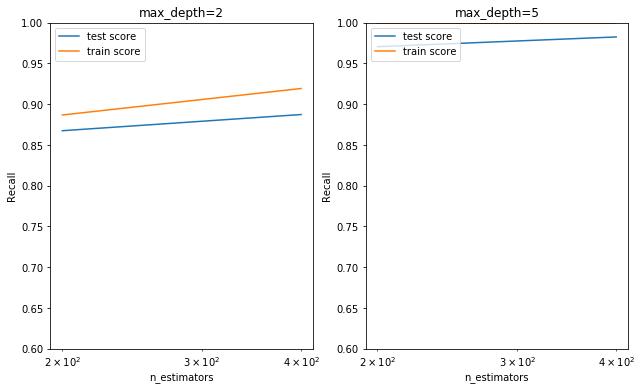

In [278]:
# plotting recall score with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('Recall')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


** Observation **: We see that with depth 5, the ensemble is overfitting. So we can go with n_estimators = 400 and max depth = 2

In [279]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=1.5,
    n_estimators=400,
    algorithm="SAMME")

ABC.fit(df_train_pca, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.5, n_estimators=400, random_state=None)

In [280]:
y_pred = ABC.predict(df_test_pca)

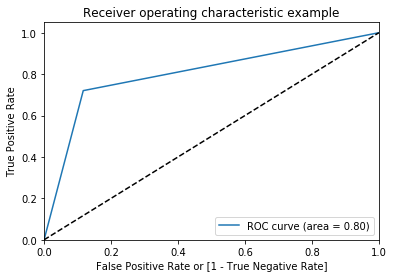

(array([0.        , 0.11700295, 1.        ]),
 array([0.        , 0.72036474, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [281]:
draw_roc(y_test, y_pred)

In [282]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

0.8708172091964489
0.7203647416413373


### ** Observation **:Based on all models above, we deem that the model with 400 n estimators and max depth 2 has the best recall percentage with 72% and works best for identifying the telecom churners and potentially promote offers, thus help with retention

In [283]:
# Updating the results in the model_results dataframe to enable comparison

In [284]:
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'Accuracy'] = metrics.accuracy_score(y_test, y_pred) * 100 
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'Recall'] = metrics.recall_score(y_test, y_pred) * 100
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'AUC'] = metrics.roc_auc_score(y_test, y_pred) * 100 
model_results.loc[model_results['Algorithm'] == 'Ada Boost', 'Precision'] = metrics.precision_score(y_test, y_pred) * 100


## Observations:

In [285]:
model_results

,Algorithm,Accuracy,Recall,Precision,AUC
0,Logistic Regression,82.847712,84.802432,28.396947,83.745950
1,SVM,0.000000,0.000000,0.000000,0.000000
2,Decision Tree,82.665604,65.197568,24.898433,74.638646
3,Random Forests,85.966310,77.203647,31.929604,81.939668
4,Ada Boost,87.081721,72.036474,33.263158,80.168089


In [286]:
# We will remove SVM since we are not considering it due to high execution time.

model_results = model_results.loc[model_results['Algorithm'] != 'SVM']

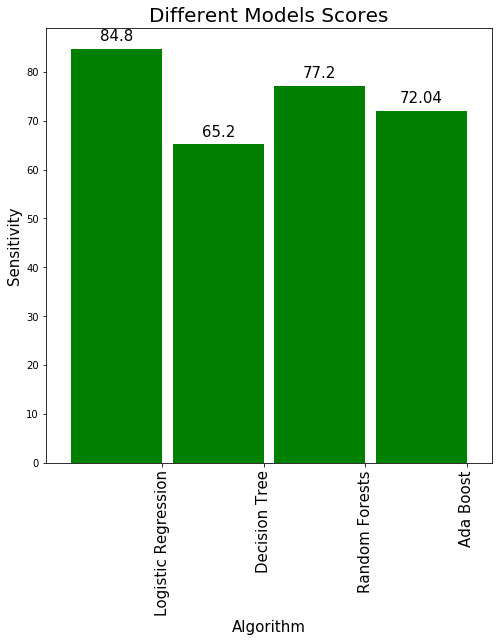

In [287]:
# Plot to show the model performances on Accuracy and Sensitivity

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

model_results.Recall.plot(kind='bar', color='green', ax=ax, width=width, position=1)

rects = ax.patches
for rect in rects: 
    height = rect.get_height() 
    ax.text(rect.get_x() + rect.get_width()/2, height+1, round(height,2), ha="center", va="bottom", fontsize = 15) 
plt.title("Different Models Scores", fontsize = 20)

ax.set_xticklabels(model_results.Algorithm, fontsize=15, rotation=90)
ax.set_ylabel('Sensitivity',fontsize=15)

plt.xlabel('Algorithm', fontsize = 15)


plt.show()

## We infer from the graph that Logistic Regression Model Peforms well on Sensitivity with a Recall Percentage of 84.8% to identify the Churners Correctly

# Part 2 : Identify important featurers that help identify Churners

### Now lets build a model to identify the important features to be able to identify the Churners

#### ** We cannot do this with the PCA transformed data since the PCA dimensions are not interpretable **

####  We will consider the Non PCA transformed Original Data and proceed with model building **

In [288]:
# Non PCA Data

X_train = X_train_non_pca.copy()
y_train = y_train_non_pca.copy()

In [289]:
X_train.shape

(20499, 113)

In [290]:
X_test.shape

(8786, 113)

### Method - 1: We will use Logistic Regression to identify the significant variables

In [291]:
# Building the first model with all the features

from sklearn.linear_model import LogisticRegression

# instantiate
lm = LogisticRegression()

# fit
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [292]:
# Predict

y_pred = lm.predict(X_test)

In [293]:

print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      8128
          1       0.59      0.22      0.32       658

avg / total       0.91      0.93      0.91      8786

[[8027  101]
 [ 515  143]]
0.21732522796352582
0.9298884589119053


** Observation **: Lets check to know if there are any correlations existing in the dataset.

### Lets use Stats model with the Logistic Regression model to determine the P value and VIF value to remove the multicollenearity and identify the main contributers

In [294]:
y_train = list(y_train)

In [295]:
# Stats model

logm1 = stats.GLM(y_train,(stats.add_constant(X_train)), family = stats.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20394
Model Family:                Binomial   Df Model:                          104
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3686.1
Date:                Tue, 12 Jun 2018   Deviance:                       7372.1
Time:                        16:13:02   Pearson chi2:                 4.75e+06
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0700      0.073    -55.963      0.000      -4.212      -3.927
arpu_6                -0.0622      0.126     -0.493      0.622      -0.309       0.185
arpu_7                -0.0527      0.138     -0.381      0.703      -0.324       0.218
arpu_8                 0.0864      0.169      0.512      0.609      -0.244       0.417
roam_ic_mou_6          0.0758      0.036      2.127      0.033       0.006       0.146
roam_ic_mou_7         -0.0185      0.042     -0.443      0.658      -0.100       0.063
roam_ic_mou_8         -0.0206      0.036     -0.571      0.568      -0.091       0.050
roam_og_mou_6          0.5361      0.549      0.976      0.329      -0.540       1.612
roam_og_mou_7         -0.2234      0.369     -0.605      0.545      -0.947       0.500
roam_og_mou_8          1.2093      0.485      2.492      0.013       0.258       2.160
loc_og_mou_6       -2544.1965   1748.966     -1.455      0.146   -5972.106     883.713
loc_og_mou_7        2193.8739   1968.546      1.114      0.265   -1664.406    6052.153
loc_og_mou_8        1.282e+04   2093.380      6.124      0.000    8716.055    1.69e+04
std_og_mou_6       -4042.5173   2778.983     -1.455      0.146   -9489.225    1404.190
std_og_mou_7        3718.5536   3336.490      1.115      0.265   -2820.846    1.03e+04
std_og_mou_8        2.161e+04   3528.769      6.124      0.000    1.47e+04    2.85e+04
isd_og_mou_6        -305.2380    209.838     -1.455      0.146    -716.513     106.037
isd_og_mou_7         268.3181    240.530      1.116      0.265    -203.113     739.749
isd_og_mou_8        1585.9444    259.043      6.122      0.000    1078.230    2093.659
spl_og_mou_6        -125.1747     86.016     -1.455      0.146    -293.763      43.414
spl_og_mou_7         135.7071    121.721      1.115      0.265    -102.861     374.275
spl_og_mou_8         808.9830    132.127      6.123      0.000     550.018    1067.948
og_others_6          -15.3392     10.529     -1.457      0.145     -35.975       5.296
og_others_7           16.1953     14.512      1.116      0.264     -12.249      44.639
og_others_8          117.5896     19.201      6.124      0.000      79.955     155.224
total_og_mou_6      4396.0442   3019.837      1.456      0.145   -1522.727    1.03e+04
total_og_mou_7     -3983.4670   3571.980     -1.115      0.265    -1.1e+04    3017.485
total_og_mou_8     -2.388e+04   3901.291     -6.122      0.000   -3.15e+04   -1.62e+04
loc_ic_mou_6       -1114.5820   1576.381     -0.707      0.480   -4204.233    1975.069
loc_ic_mou_7        2465.6391   1692.695      1.457      0.145    -851.982    5783.260
loc_ic_mou_8         1.26e+04   1854.988      6.795      0.000    8968.553    1.62e+04
std_ic_mou_6        -499.7519    706.981     -0.707      0.480   -1885.409     885.905
std_ic_mou_7        1167.6592    801.735      1.456      0.145    -403.712    2739.031
std_ic_mou_8        5809.8993 

** RFE selection ** Lets use RFE to reduce the number of features to a considerable number and then proceed with checking on the p value and vif

In [296]:
# Use RFE to reduce to 60 features


lm = LogisticRegression()
rfe_60 = RFE(lm, 60)

# fit with 60 features
rfe_60.fit(X_train, y_train)

# Printing the boolean results
print(rfe_60.support_)           
print(rfe_60.ranking_)  

[False False False  True False False False  True  True  True False  True
  True  True False False  True  True False False False False False False
 False False  True False  True  True  True False False False  True  True
 False False  True  True False False False  True False False  True  True
  True False False False  True  True False False  True  True False  True
  True  True  True False False  True False False  True  True False  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False False  True  True
  True  True False  True  True  True  True False False False False False
  True False False False  True]
[35 11 28  1 44 48 30  1  1  1 52  1  1  1  9 40  1  1 12 13  2 33 51 10
 19  3  1 43  1  1  1 34 15 31  1  1 20 14  1  1  6 16 24  1 23 46  1  1
  1 39 53 17  1  1  4  8  1  1 27  1  1  1  1 25 41  1 38 50  1  1 26  1
 47  1  1  1  1  1  1  1 45  1  1  1  1  1  1 54  1  1  1  1 18 37  1  1
  1  1 42  1  1  1 

In [297]:
col = list(X_train.columns[rfe_60.support_])
drop_col = list(X_train.columns[~rfe_60.support_])

In [298]:
# Use the stats model to know the p value and the VIF values
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=stats.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [299]:
#Run the StatsModels to know the P value and VIF

logm2 = stats.GLM(y_train,(stats.add_constant(X_train[col])), family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20439
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3757.2
Date:                Tue, 12 Jun 2018   Deviance:                       7514.4
Time:                        16:14:20   Pearson chi2:                 4.40e+08
No. Iterations:                    15   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1302      0.075    -55.038      0.000      -4.277      -3.983
roam_ic_mou_6          0.0694      0.028      2.521      0.012       0.015       0.123
roam_og_mou_7          0.1627      0.031      5.250      0.000       0.102       0.223
roam_og_mou_8          0.6833      0.292      2.339      0.019       0.111       1.256
loc_og_mou_6           0.0955      0.054      1.778      0.075      -0.010       0.201
loc_og_mou_8          -0.3813      0.129     -2.950      0.003      -0.635      -0.128
std_og_mou_6           0.1446      0.044      3.272      0.001       0.058       0.231
std_og_mou_7           0.1817      0.051      3.538      0.000       0.081       0.282
isd_og_mou_7           0.1549      0.131      1.181      0.237      -0.102       0.412
isd_og_mou_8          -0.2523      0.140     -1.806      0.071      -0.526       0.021
total_og_mou_8         3.5399      1.848      1.916      0.055      -0.082       7.162
loc_ic_mou_7           0.3376      0.140      2.404      0.016       0.062       0.613
loc_ic_mou_8          -1.0739      0.275     -3.903      0.000      -1.613      -0.535
std_ic_mou_6           0.1170      0.043      2.696      0.007       0.032       0.202
total_ic_mou_7         0.2547      0.131      1.949      0.051      -0.001       0.511
total_ic_mou_8        -1.2199      0.226     -5.398      0.000      -1.663      -0.777
spl_ic_mou_8          -0.2809      0.054     -5.163      0.000      -0.388      -0.174
isd_ic_mou_6           0.1203      0.042      2.855      0.004       0.038       0.203
ic_others_7           -0.1740      0.103     -1.691      0.091      -0.376       0.028
total_rech_num_7       0.0986      0.047      2.103      0.035       0.007       0.190
total_rech_num_8      -0.2244      0.070     -3.207      0.001      -0.362      -0.087
total_rech_amt_6       0.1424      0.053      2.690      0.007       0.039       0.246
max_rech_amt_7         0.0756      0.035      2.176      0.030       0.008       0.144
max_rech_amt_8         0.0744      0.050      1.484      0.138      -0.024       0.173
last_day_rch_amt_8    -0.5632      0.064     -8.790      0.000      -0.689      -0.438
total_rech_data_6      0.1050      0.289      0.363      0.716      -0.461       0.671
total_rech_data_8     -0.1137      0.046     -2.461      0.014      -0.204      -0.023
max_rech_data_6        0.1659      0.093      1.788      0.074      -0.016       0.348
max_rech_data_7        0.1073      0.089      1.205      0.228      -0.067       0.282
max_rech_data_8       -0.3016      0.138     -2.192      0.028      -0.571      -0.032
count_rech_2g_8       -0.1029      0.062     -1.671      0.095      -0.224       0.018
count_rech_3g_8       -0.0694      0.086     -0.804      0.421      -0.239       0.100
av_rech_amt_data_6    -0.4410      0.148     -2.970      0.003      -0.732      -0.150
av_rech_amt_data_8     0.1065 

In [300]:
# find the VIF values
vif_cal(input_data=churn.drop(drop_col, axis=1), dependent_col='churned')

C:\Users\Raghavendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


,Var,Vif
30,count_rech_2g_8,inf
26,total_rech_data_8,inf
31,count_rech_3g_8,inf
59,net_mou_8,2487.060000
10,total_og_mou_8,2454.960000
56,fb_user_7,87.540000
45,night_pck_user_7,77.930000
3,roam_og_mou_8,62.280000
25,total_rech_data_6,53.840000
57,fb_user_8,33.790000


In [301]:
# Removing the High VIF values - that is highly correlated features

drop_col = drop_col + ['count_rech_2g_8', 'count_rech_3g_8','total_rech_data_8']

In [302]:
#Run the StatsModels to know the P value and VIF

X_train_2 = X_train.drop(drop_col, 1)
logm2 = stats.GLM(y_train,(stats.add_constant(X_train_2)), family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20441
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3760.9
Date:                Tue, 12 Jun 2018   Deviance:                       7521.8
Time:                        16:14:32   Pearson chi2:                 4.33e+08
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1267      0.075    -55.024      0.000      -4.274      -3.980
roam_ic_mou_6          0.0694      0.028      2.523      0.012       0.015       0.123
roam_og_mou_7          0.1606      0.031      5.200      0.000       0.100       0.221
roam_og_mou_8          0.6885      0.293      2.353      0.019       0.115       1.262
loc_og_mou_6           0.0914      0.054      1.699      0.089      -0.014       0.197
loc_og_mou_8          -0.3859      0.129     -2.985      0.003      -0.639      -0.132
std_og_mou_6           0.1448      0.044      3.279      0.001       0.058       0.231
std_og_mou_7           0.1739      0.051      3.397      0.001       0.074       0.274
isd_og_mou_7           0.1526      0.131      1.162      0.245      -0.105       0.410
isd_og_mou_8          -0.2536      0.140     -1.813      0.070      -0.528       0.021
total_og_mou_8         3.5718      1.852      1.929      0.054      -0.057       7.201
loc_ic_mou_7           0.3374      0.140      2.404      0.016       0.062       0.612
loc_ic_mou_8          -1.0817      0.275     -3.935      0.000      -1.621      -0.543
std_ic_mou_6           0.1125      0.043      2.622      0.009       0.028       0.197
total_ic_mou_7         0.2576      0.130      1.974      0.048       0.002       0.513
total_ic_mou_8        -1.2143      0.226     -5.384      0.000      -1.656      -0.772
spl_ic_mou_8          -0.2813      0.054     -5.165      0.000      -0.388      -0.175
isd_ic_mou_6           0.1196      0.042      2.849      0.004       0.037       0.202
ic_others_7           -0.1759      0.103     -1.709      0.087      -0.378       0.026
total_rech_num_7       0.1159      0.046      2.496      0.013       0.025       0.207
total_rech_num_8      -0.2664      0.069     -3.879      0.000      -0.401      -0.132
total_rech_amt_6       0.1466      0.053      2.779      0.005       0.043       0.250
max_rech_amt_7         0.0739      0.035      2.124      0.034       0.006       0.142
max_rech_amt_8         0.0743      0.050      1.480      0.139      -0.024       0.173
last_day_rch_amt_8    -0.5635      0.064     -8.796      0.000      -0.689      -0.438
total_rech_data_6     -0.0068      0.286     -0.024      0.981      -0.568       0.554
max_rech_data_6        0.1415      0.092      1.536      0.124      -0.039       0.322
max_rech_data_7        0.0894      0.089      1.005      0.315      -0.085       0.264
max_rech_data_8       -0.1501      0.127     -1.184      0.236      -0.399       0.098
av_rech_amt_data_6    -0.3873      0.146     -2.651      0.008      -0.674      -0.101
av_rech_amt_data_8    -0.1600      0.181     -0.882      0.378      -0.516       0.196
vol_2g_mb_7            0.0922      0.048      1.938      0.053      -0.001       0.185
vol_2g_mb_8           -0.1844      0.082     -2.262      0.024      -0.344      -0.025
vol_3g_mb_6            0.2267 

In [303]:
# find the VIF values
vif_cal(input_data=churn.drop(drop_col, axis=1), dependent_col='churned')

,Var,Vif
56,net_mou_8,2486.55
10,total_og_mou_8,2454.18
53,fb_user_7,87.53
42,night_pck_user_7,77.86
3,roam_og_mou_8,62.26
25,total_rech_data_6,53.17
54,fb_user_8,33.54
46,sachet_2g_6,29.82
43,night_pck_user_8,26.26
52,fb_user_6,24.72


In [304]:
# There are many corelated variables. Lets try checking the corr matrix

In [305]:
# Create correlation matrix
corr_matrix = X_train_2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [306]:
# Find index of feature columns with correlation greater than 0.69
to_drop = [column for column in upper.columns if any(upper[column] > 0.69)]

In [307]:
cor_mat1 = (X_train_2.drop(to_drop, axis =1)).corr()

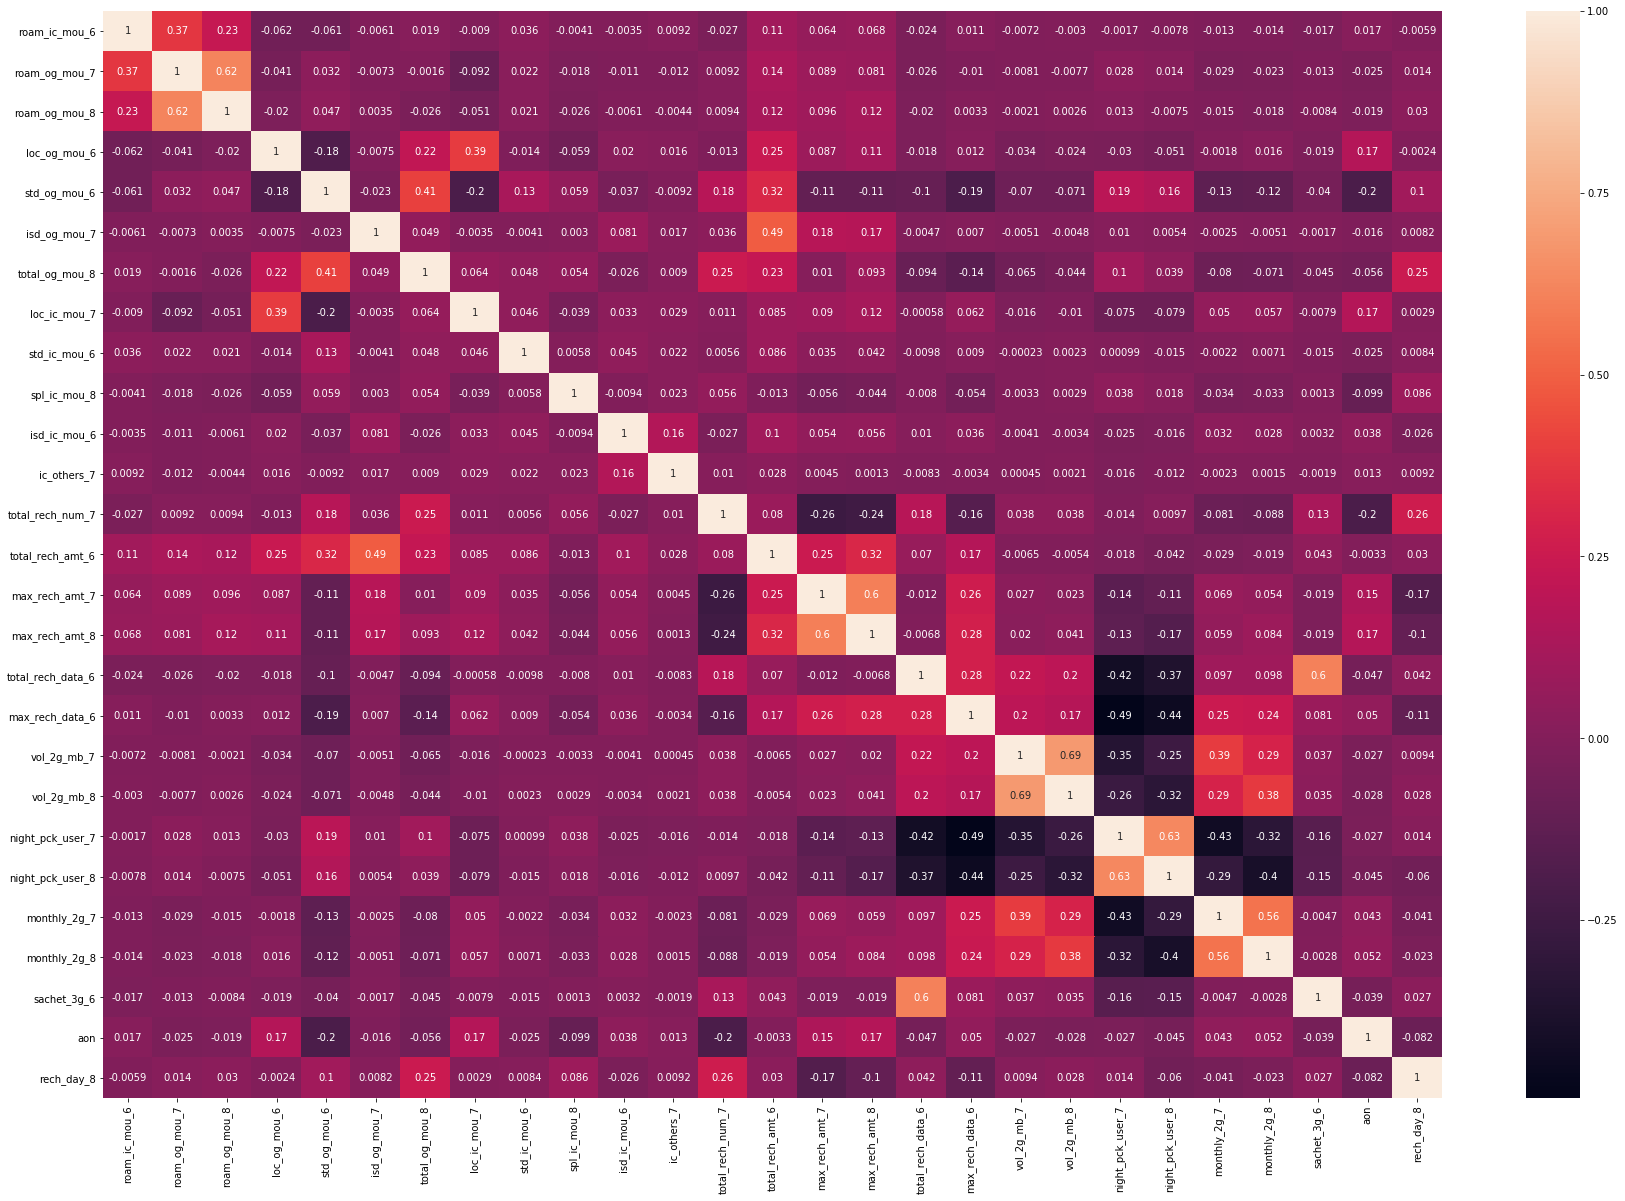

In [308]:
plt.figure(figsize = (30,20))
sns.heatmap(cor_mat1, annot= True)

In [309]:
#Run the StatsModels to know the P value and VIF

X_train_3 = X_train_2.drop(to_drop, 1)
logm2 = stats.GLM(y_train,X_train_3, family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20472
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13770.
Date:                Tue, 12 Jun 2018   Deviance:                       27540.
Time:                        16:14:46   Pearson chi2:                 2.07e+04
No. Iterations:                     4   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
roam_ic_mou_6         0.0488      0.018      2.778      0.005       0.014       0.083
roam_og_mou_7         0.1011      0.021      4.714      0.000       0.059       0.143
roam_og_mou_8         0.0197      0.020      0.998      0.318      -0.019       0.058
loc_og_mou_6          0.0583      0.019      3.149      0.002       0.022       0.095
std_og_mou_6          0.2238      0.022     10.361      0.000       0.181       0.266
isd_og_mou_7          0.0099      0.015      0.644      0.520      -0.020       0.040
total_og_mou_8       -0.2620      0.020    -13.388      0.000      -0.300      -0.224
loc_ic_mou_7         -0.0403      0.016     -2.511      0.012      -0.072      -0.009
std_ic_mou_6         -0.0097      0.014     -0.697      0.486      -0.037       0.018
spl_ic_mou_8         -0.0564      0.015     -3.788      0.000      -0.086      -0.027
isd_ic_mou_6          0.0052      0.014      0.372      0.710      -0.022       0.033
ic_others_7          -0.0106      0.015     -0.716      0.474      -0.040       0.018
total_rech_num_7      0.0398      0.017      2.380      0.017       0.007       0.073
total_rech_amt_6      0.0323      0.021      1.507      0.132      -0.010       0.074
max_rech_amt_7        0.0506      0.019      2.674      0.007       0.014       0.088
max_rech_amt_8       -0.1130      0.021     -5.484      0.000      -0.153      -0.073
total_rech_data_6     0.0110      0.020      0.537      0.591      -0.029       0.051
max_rech_data_6       0.0111      0.019      0.593      0.553      -0.026       0.048
vol_2g_mb_7           0.0121      0.021      0.585      0.558      -0.028       0.052
vol_2g_mb_8          -0.0312      0.021     -1.491      0.136      -0.072       0.010
night_pck_user_7      0.0113      0.022      0.524      0.600      -0.031       0.053
night_pck_user_8      0.0761      0.020      3.760      0.000       0.036       0.116
monthly_2g_7         -0.0215      0.019     -1.139      0.255      -0.059       0.016
monthly_2g_8         -0.0191      0.019     -1.019      0.308      -0.056       0.018
sachet_3g_6          -0.0041      0.018     -0.230      0.818      -0.039       0.031
aon                  -0.1078      0.015     -7.088      0.000      -0.138      -0.078
rech_day_8           -0.1858      0.016    -11.585      0.000      -0.217      -0.154
=====================================================================================
"""

In [310]:
drop_col = drop_col + to_drop

In [311]:
# find the VIF values
vif_cal(input_data=churn.drop(drop_col, axis=1), dependent_col='churned')

,Var,Vif
14,total_rech_amt_6,2.34
21,night_pck_user_7,2.27
19,vol_2g_mb_7,2.14
17,total_rech_data_6,2.08
20,vol_2g_mb_8,2.07
5,std_og_mou_6,2.03
22,night_pck_user_8,2.00
16,max_rech_amt_8,1.79
23,monthly_2g_7,1.76
2,roam_og_mou_7,1.73


### We see that the correlated columns are dropped and VIF values for the rest of the columns are in the acceptable range

In [312]:
# Drop columns with high p values
drop_col = drop_col + ['isd_og_mou_7', 'isd_ic_mou_6', 'total_rech_data_6', 'max_rech_data_6', 'vol_2g_mb_7', 'night_pck_user_7','sachet_3g_6']

In [313]:
#Run the StatsModels to know the P value and VIF

X_train_4 = X_train.drop(drop_col, 1)
logm2 = stats.GLM(y_train,(stats.add_constant(X_train_4)), family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20478
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4166.8
Date:                Tue, 12 Jun 2018   Deviance:                       8333.6
Time:                        16:14:49   Pearson chi2:                 1.47e+09
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4378      0.050    -68.216      0.000      -3.537      -3.339
roam_ic_mou_6        0.0856      0.025      3.367      0.001       0.036       0.135
roam_og_mou_7        0.1190      0.030      4.011      0.000       0.061       0.177
roam_og_mou_8        0.0589      0.027      2.163      0.031       0.006       0.112
loc_og_mou_6        -0.0066      0.046     -0.144      0.886      -0.097       0.083
std_og_mou_6         0.4638      0.034     13.812      0.000       0.398       0.530
total_og_mou_8      -1.2549      0.062    -20.328      0.000      -1.376      -1.134
loc_ic_mou_7        -0.2832      0.055     -5.138      0.000      -0.391      -0.175
std_ic_mou_6         0.0343      0.024      1.408      0.159      -0.013       0.082
spl_ic_mou_8        -0.3369      0.057     -5.962      0.000      -0.448      -0.226
ic_others_7         -0.1206      0.088     -1.376      0.169      -0.292       0.051
total_rech_num_7     0.1623      0.031      5.318      0.000       0.102       0.222
total_rech_amt_6     0.1156      0.038      3.019      0.003       0.041       0.191
max_rech_amt_7       0.1471      0.031      4.817      0.000       0.087       0.207
max_rech_amt_8      -0.3402      0.050     -6.845      0.000      -0.438      -0.243
vol_2g_mb_8         -0.1602      0.078     -2.056      0.040      -0.313      -0.007
night_pck_user_8     0.4043      0.043      9.499      0.000       0.321       0.488
monthly_2g_7        -0.1234      0.051     -2.433      0.015      -0.223      -0.024
monthly_2g_8        -0.3316      0.084     -3.967      0.000      -0.495      -0.168
aon                 -0.4328      0.039    -11.110      0.000      -0.509      -0.356
rech_day_8          -0.3727      0.024    -15.471      0.000      -0.420      -0.325
====================================================================================
"""

In [314]:
# find the VIF values
vif_cal(input_data=churn.drop(drop_col, axis=1), dependent_col='churned')

,Var,Vif
5,std_og_mou_6,1.78
14,max_rech_amt_8,1.77
2,roam_og_mou_7,1.72
18,monthly_2g_8,1.66
13,max_rech_amt_7,1.62
3,roam_og_mou_8,1.59
12,total_rech_amt_6,1.56
6,total_og_mou_8,1.53
4,loc_og_mou_6,1.50
17,monthly_2g_7,1.49


In [315]:
drop_col = drop_col + ['loc_og_mou_6', 'std_ic_mou_6', 'ic_others_7']

In [316]:
#Run the StatsModels to know the P value and VIF

X_train_5 = X_train.drop(drop_col, 1)
logm2 = stats.GLM(y_train,(stats.add_constant(X_train_5)), family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20481
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4169.2
Date:                Tue, 12 Jun 2018   Deviance:                       8338.4
Time:                        16:14:50   Pearson chi2:                 1.56e+09
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4328      0.050    -68.444      0.000      -3.531      -3.334
roam_ic_mou_6        0.0859      0.025      3.406      0.001       0.036       0.135
roam_og_mou_7        0.1211      0.030      4.087      0.000       0.063       0.179
roam_og_mou_8        0.0576      0.027      2.123      0.034       0.004       0.111
std_og_mou_6         0.4703      0.032     14.563      0.000       0.407       0.534
total_og_mou_8      -1.2551      0.061    -20.472      0.000      -1.375      -1.135
loc_ic_mou_7        -0.2843      0.052     -5.446      0.000      -0.387      -0.182
spl_ic_mou_8        -0.3379      0.056     -5.991      0.000      -0.448      -0.227
total_rech_num_7     0.1616      0.030      5.299      0.000       0.102       0.221
total_rech_amt_6     0.1134      0.036      3.131      0.002       0.042       0.184
max_rech_amt_7       0.1468      0.030      4.818      0.000       0.087       0.207
max_rech_amt_8      -0.3377      0.049     -6.840      0.000      -0.434      -0.241
vol_2g_mb_8         -0.1601      0.078     -2.055      0.040      -0.313      -0.007
night_pck_user_8     0.4038      0.043      9.485      0.000       0.320       0.487
monthly_2g_7        -0.1235      0.051     -2.436      0.015      -0.223      -0.024
monthly_2g_8        -0.3310      0.084     -3.961      0.000      -0.495      -0.167
aon                 -0.4350      0.039    -11.185      0.000      -0.511      -0.359
rech_day_8          -0.3727      0.024    -15.499      0.000      -0.420      -0.326
====================================================================================
"""

In [317]:
# find the VIF values
vif_cal(input_data=churn.drop(drop_col, axis=1), dependent_col='churned')

,Var,Vif
11,max_rech_amt_8,1.76
2,roam_og_mou_7,1.71
15,monthly_2g_8,1.66
10,max_rech_amt_7,1.62
3,roam_og_mou_8,1.59
4,std_og_mou_6,1.57
14,monthly_2g_7,1.48
9,total_rech_amt_6,1.39
5,total_og_mou_8,1.39
13,night_pck_user_8,1.31


In [318]:
drop_col = drop_col + ['roam_og_mou_8','vol_2g_mb_8']

In [319]:
#Run the StatsModels to know the P value and VIF

X_train_6 = X_train.drop(drop_col, 1)
logm2 = stats.GLM(y_train,(stats.add_constant(X_train_6)), family = stats.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20499
Model:                            GLM   Df Residuals:                    20483
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4173.9
Date:                Tue, 12 Jun 2018   Deviance:                       8347.8
Time:                        16:14:51   Pearson chi2:                 1.76e+09
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4262      0.050    -68.730      0.000      -3.524      -3.329
roam_ic_mou_6        0.0827      0.025      3.302      0.001       0.034       0.132
roam_og_mou_7        0.1606      0.023      7.064      0.000       0.116       0.205
std_og_mou_6         0.4765      0.032     14.855      0.000       0.414       0.539
total_og_mou_8      -1.2639      0.061    -20.729      0.000      -1.383      -1.144
loc_ic_mou_7        -0.2789      0.052     -5.374      0.000      -0.381      -0.177
spl_ic_mou_8        -0.3413      0.057     -6.039      0.000      -0.452      -0.231
total_rech_num_7     0.1616      0.030      5.329      0.000       0.102       0.221
total_rech_amt_6     0.1140      0.035      3.233      0.001       0.045       0.183
max_rech_amt_7       0.1477      0.030      4.866      0.000       0.088       0.207
max_rech_amt_8      -0.3192      0.047     -6.738      0.000      -0.412      -0.226
night_pck_user_8     0.4384      0.040     10.994      0.000       0.360       0.517
monthly_2g_7        -0.1284      0.050     -2.545      0.011      -0.227      -0.030
monthly_2g_8        -0.3616      0.082     -4.385      0.000      -0.523      -0.200
aon                 -0.4345      0.039    -11.177      0.000      -0.511      -0.358
rech_day_8          -0.3707      0.024    -15.458      0.000      -0.418      -0.324
====================================================================================
"""

In [320]:
### We see that the following variables are the important features.

X_train_6.columns

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'night_pck_user_8', 'monthly_2g_7',
       'monthly_2g_8', 'aon', 'rech_day_8'],
      dtype='object')

In [321]:
# Number of Important Features
len(X_train_6.columns)

15

In [322]:
# To find the coefficients to understand the feature importance on graph

lm.fit(X_train_6,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [323]:
# Let's see the coefficient
coeff_df = pd.DataFrame(columns=["features","coeff"])
coeff_df['features'] = X_train_6.columns
coeff_df['coeff'] = lm.coef_[0]
coeff_df

,features,coeff
0,roam_ic_mou_6,0.082456
1,roam_og_mou_7,0.160572
2,std_og_mou_6,0.474945
3,total_og_mou_8,-1.254884
4,loc_ic_mou_7,-0.277464
5,spl_ic_mou_8,-0.338806
6,total_rech_num_7,0.160479
7,total_rech_amt_6,0.114259
8,max_rech_amt_7,0.147149
9,max_rech_amt_8,-0.319467


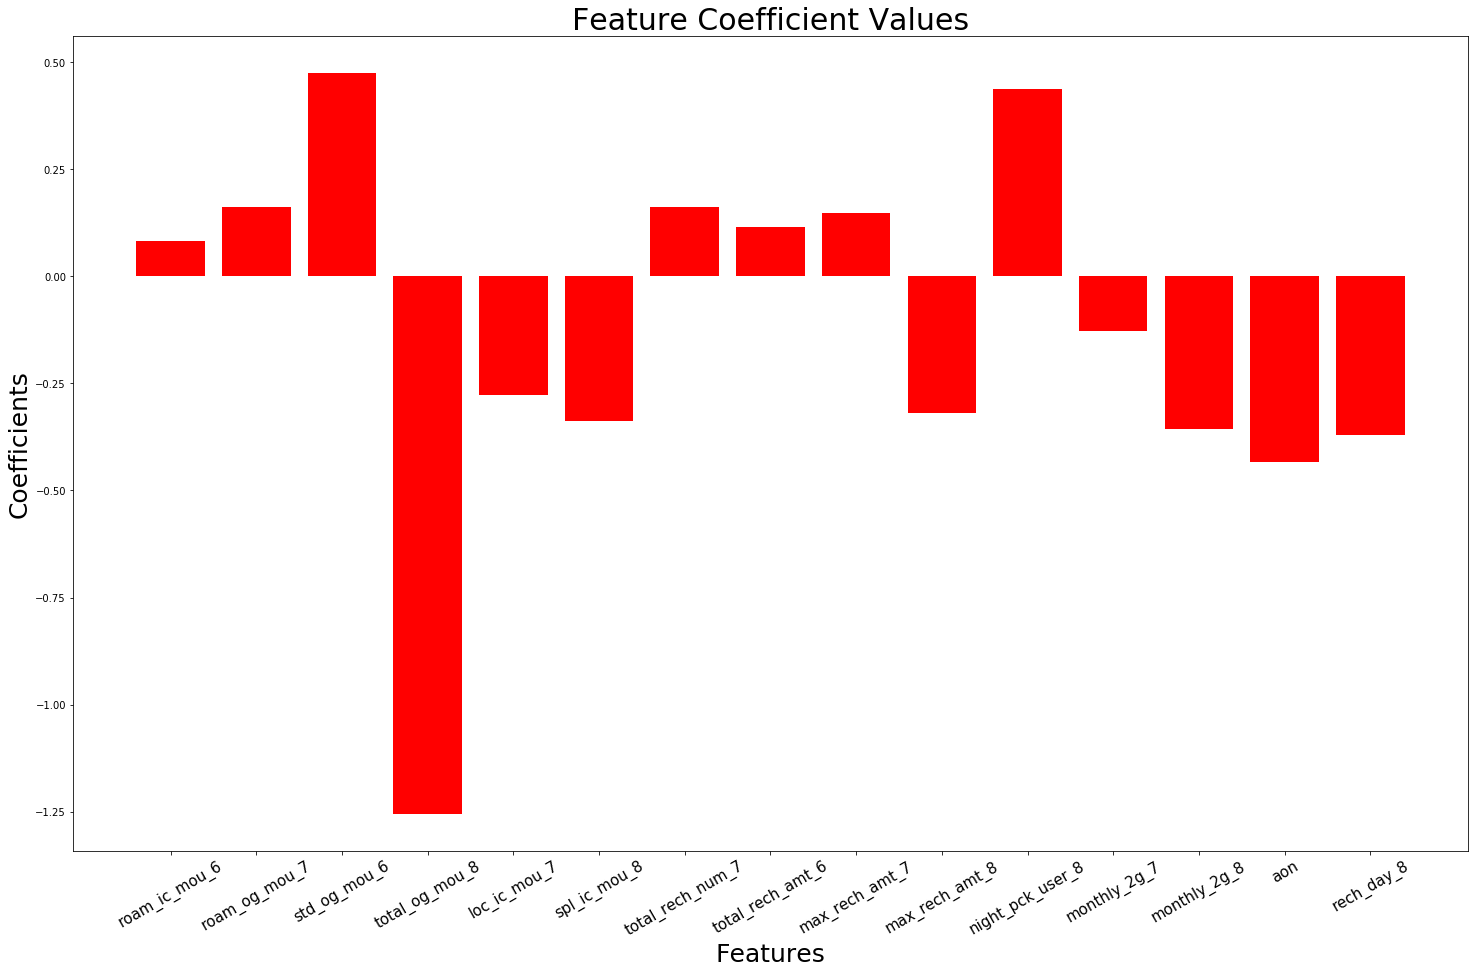

In [324]:
# Plot to show the Features Importances

plt.figure(figsize=(25,15))
plt.title("Feature Coefficient Values", fontsize = 30)
plt.bar(coeff_df.features, coeff_df.coeff, color="r", align="center")
plt.xlabel('Features', fontsize = 25)
plt.ylabel('Coefficients', fontsize = 25)
plt.xticks(fontsize=15, rotation=30)
plt.show()

### Method - 2 : Using Lasso to select features

In [325]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]} 

In [326]:
lasso = Lasso()
folds = 3

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [327]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.757254,0.232180,0.003004,8.155615e-04,0.0001,{'alpha': 0.0001},-0.142574,-0.143157,-0.140913,-0.142215,0.000950,3,-0.139587,-0.138989,-0.143885,-0.140820,0.002181
1,0.267857,0.046582,0.002337,4.722695e-04,0.001,{'alpha': 0.001},-0.141242,-0.142006,-0.139879,-0.141042,0.000880,2,-0.138697,-0.138390,-0.143188,-0.140092,0.002193
2,0.083059,0.001415,0.002670,4.722141e-04,0.01,{'alpha': 0.01},-0.136465,-0.138170,-0.136038,-0.136891,0.000921,1,-0.134642,-0.134938,-0.140062,-0.136547,0.002488
3,0.052372,0.002626,0.003003,4.052337e-07,0.05,{'alpha': 0.05},-0.144269,-0.144525,-0.141486,-0.143426,0.001376,4,-0.141728,-0.141240,-0.147255,-0.143408,0.002728
4,0.056040,0.002452,0.003003,2.973602e-07,0.1,{'alpha': 0.1},-0.144275,-0.144525,-0.141511,-0.143437,0.001366,5,-0.141736,-0.141240,-0.147289,-0.143421,0.002742


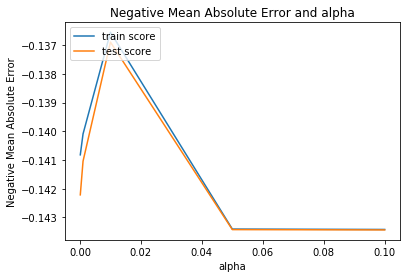

In [328]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [329]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [330]:
lasso.coef_

array([ 0.00142873,  0.00020589, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01628747,  0.        , -0.        ,
       -0.        , -0.        ,  0.02262967,  0.00295535, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.03771884, -0.        , -0.        , -0.00107205,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.01683371, -0.        , -0.        , -0.00254299,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.00062142,  0.        , -0.00269252,  0.00155553,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.01614948,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.  

In [331]:
# Identify the column names of the features selected by Lasso

col = X_train.columns

In [332]:
df = pd.DataFrame(columns=["features","coeff"])


In [333]:
lasso.coef_

array([ 0.00142873,  0.00020589, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01628747,  0.        , -0.        ,
       -0.        , -0.        ,  0.02262967,  0.00295535, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.03771884, -0.        , -0.        , -0.00107205,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.01683371, -0.        , -0.        , -0.00254299,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.00062142,  0.        , -0.00269252,  0.00155553,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.01614948,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.  

In [334]:
df["coeff"] = lasso.coef_

In [335]:
df["features"] = col

In [336]:
df.head()

,features,coeff
0,arpu_6,0.001429
1,arpu_7,0.000206
2,arpu_8,-0.000000
3,roam_ic_mou_6,0.000000
4,roam_ic_mou_7,0.000000


In [337]:
lasso_coeff = df.loc[df["coeff"] != 0]

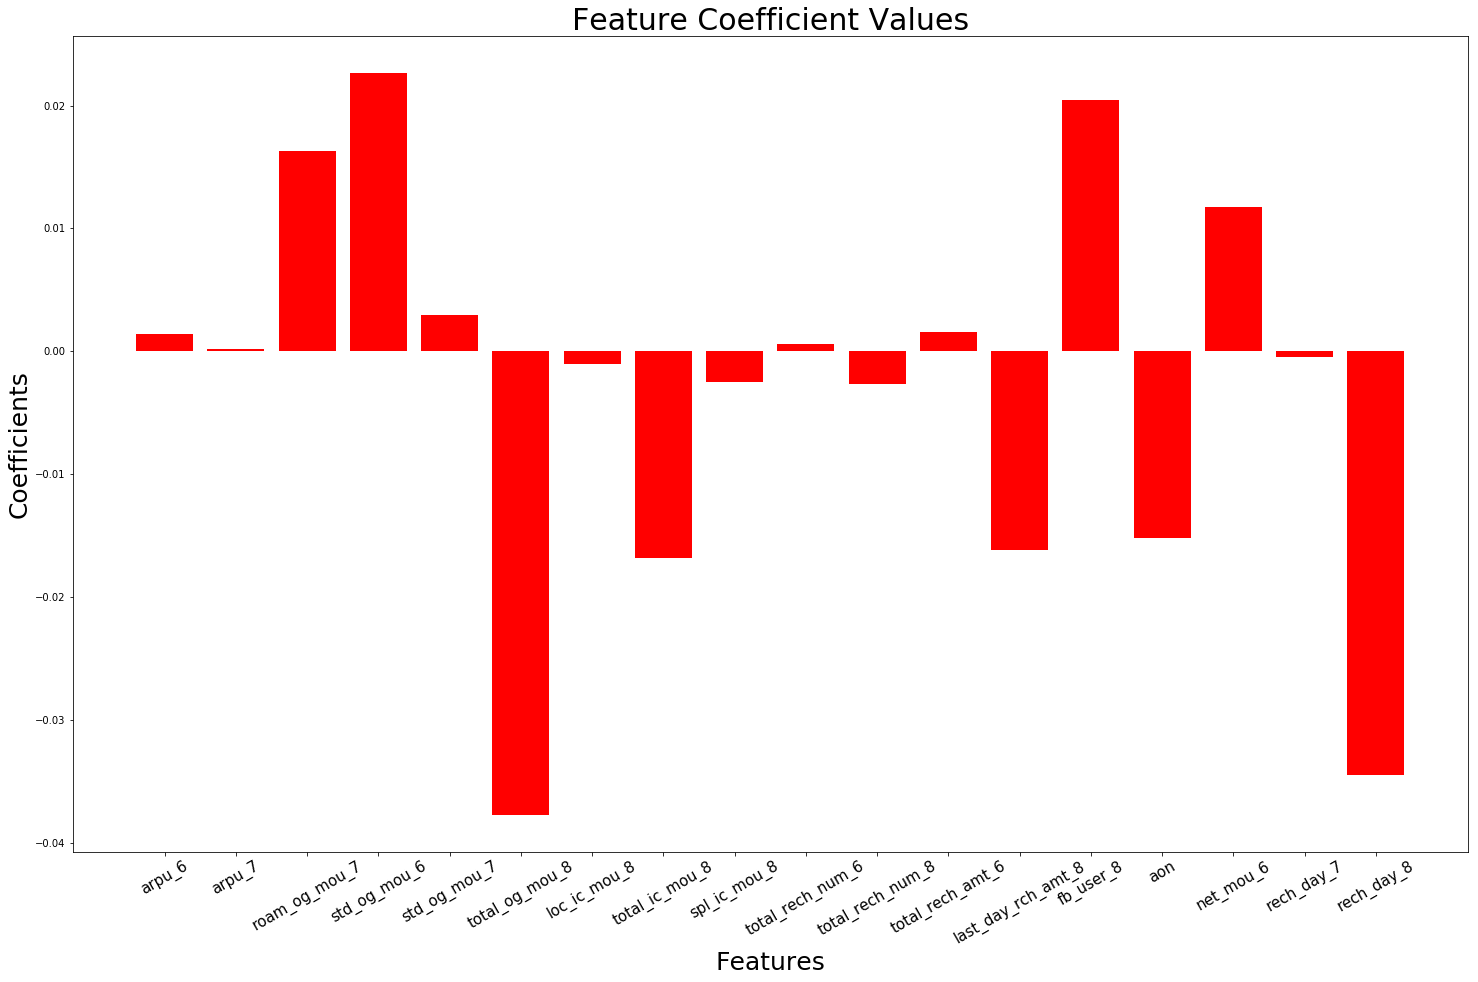

In [338]:
# Plot to show the Features Importances

plt.figure(figsize=(25,15))
plt.title("Feature Coefficient Values", fontsize = 30)
plt.bar(lasso_coeff.features, lasso_coeff.coeff, color="r", align="center")
plt.xlabel('Features', fontsize = 25)
plt.ylabel('Coefficients', fontsize = 25)
plt.xticks(fontsize=15, rotation=30)
plt.show()

#### The above listed features are the important features of interest derived using Lasso Regression

### Method - 3: We will use Random Forests to identify the significant variables

In [339]:
X_train = X_train_res.copy()
y_train = y_train_res.copy()

In [340]:
X_train.shape

(37810, 113)

In [341]:
y_train.shape

(37810,)

In [342]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [343]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [344]:
# Making predictions
y_pred = rfc.predict(X_test)

In [345]:
# Let's check the report of our default model
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      8128
          1       0.51      0.59      0.55       658

avg / total       0.93      0.93      0.93      8786



In [346]:
# Accuracy and sensitivity/ recall of model with default options
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9273844753016162
0.5851063829787234


#### Tuning max_depth

In [347]:
# specify number of folds for k-fold CV
n_folds = 3

In [348]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

In [349]:
# instantiate the model
rf = RandomForestClassifier()

In [350]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [351]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.261852,0.030706,0.019693,0.003096,2,{'max_depth': 2},0.727547,0.728340,0.787970,0.747950,0.028298,4,0.743791,0.728557,0.786576,0.752975,0.024560
1,0.644124,0.011622,0.021694,0.000480,7,{'max_depth': 7},0.875436,0.913202,0.911284,0.899974,0.017369,3,0.920971,0.911132,0.901857,0.911320,0.007805
2,0.940667,0.030255,0.028354,0.001887,12,{'max_depth': 12},0.930022,0.959378,0.967942,0.952446,0.016238,2,0.986194,0.974451,0.980562,0.980402,0.004795
3,1.094442,0.006186,0.029027,0.000809,17,{'max_depth': 17},0.933354,0.970644,0.976670,0.960222,0.019158,1,0.998651,0.996905,0.995954,0.997170,0.001117


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


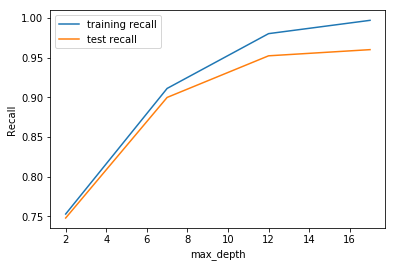

In [352]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [353]:
# specify number of folds for k-fold CV
# tuning n estimators

n_folds = 3

In [354]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 1800, 400)}

In [355]:
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)

In [356]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1800, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [357]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.049080,0.148068,0.132433,0.004186,100,{'n_estimators': 100},0.838147,0.863853,0.858118,0.853372,0.011018,5,0.871539,0.854241,0.843621,0.856467,0.011505
1,19.308854,0.246650,0.612775,0.004493,500,{'n_estimators': 500},0.842272,0.867978,0.868116,0.859455,0.012151,2,0.876220,0.859716,0.853380,0.863105,0.009627
2,37.396847,3.819939,1.149822,0.056457,900,{'n_estimators': 900},0.843066,0.866392,0.872401,0.860619,0.012653,1,0.877251,0.857336,0.857347,0.863978,0.009386
3,51.021221,0.730256,1.632165,0.028307,1300,{'n_estimators': 1300},0.842272,0.865916,0.868434,0.858873,0.011784,3,0.876379,0.857574,0.852825,0.862259,0.010171
4,66.156769,0.755798,2.116842,0.051473,1700,{'n_estimators': 1700},0.841003,0.864964,0.867164,0.857710,0.011848,4,0.874474,0.856383,0.852745,0.861201,0.009502


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


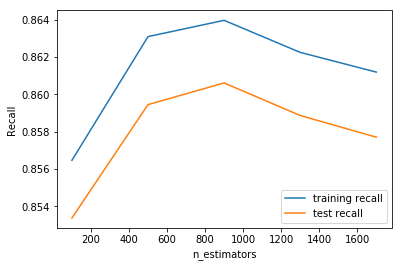

In [358]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation : ** Around 500 trees to get a high recall

#### Tuning max features

In [359]:
# parameters to build the model on
parameters = {'max_features': [4,8,14, 20, 24, 28, 32]}

In [360]:
# instantiate the model
rf = RandomForestClassifier(max_depth=4)

In [361]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [362]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.340241,0.060214,0.030021,0.004902,4,{'max_features': 4},0.787686,0.820057,0.808126,0.805290,0.013367,7,0.817266,0.811235,0.803792,0.810765,0.005511
1,0.416962,0.022884,0.023357,0.004025,8,{'max_features': 8},0.765630,0.828785,0.821774,0.805395,0.028265,6,0.789891,0.820757,0.815535,0.808728,0.013489
2,0.618432,0.026556,0.023030,0.001426,14,{'max_features': 14},0.839257,0.876706,0.867323,0.861095,0.015910,5,0.874871,0.867651,0.851317,0.864613,0.009853
3,0.799233,0.003301,0.022357,0.001255,20,{'max_features': 20},0.846081,0.874326,0.866370,0.862259,0.011892,4,0.877966,0.866460,0.853697,0.866041,0.009912
4,0.959347,0.020251,0.021355,0.000468,24,{'max_features': 24},0.859886,0.881784,0.876845,0.872838,0.009378,2,0.889312,0.876379,0.860203,0.875298,0.011908


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


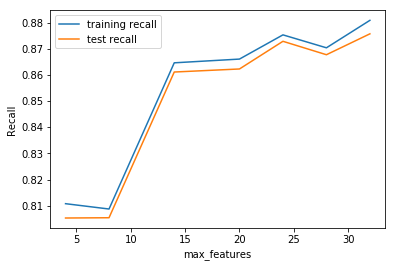

In [363]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation: ** Around 30 features seems to provide highest recall 

#### Tuning min_samples_leaf

In [364]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

In [365]:
# instantiate the model
rf = RandomForestClassifier()


In [366]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [367]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.822250,0.068606,0.026359,0.000948,100,{'min_samples_leaf': 100},0.856236,0.895113,0.903349,0.884898,0.020545,1,0.896850,0.890899,0.889876,0.892542,0.003075
1,0.723512,0.018251,0.025352,0.000472,150,{'min_samples_leaf': 150},0.847191,0.876388,0.886367,0.869981,0.016623,2,0.882488,0.868047,0.871707,0.874081,0.006130
2,0.662136,0.013434,0.025031,0.000817,200,{'min_samples_leaf': 200},0.841955,0.872580,0.881606,0.865380,0.016969,4,0.868682,0.865032,0.868375,0.867363,0.001653
3,0.643124,0.009184,0.024357,0.000948,250,{'min_samples_leaf': 250},0.840051,0.874484,0.881606,0.865380,0.018145,4,0.873760,0.865984,0.865360,0.868368,0.003821
4,0.654301,0.071122,0.027032,0.003261,300,{'min_samples_leaf': 300},0.845287,0.867185,0.885098,0.865856,0.016279,3,0.877489,0.856542,0.865757,0.866596,0.008572


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


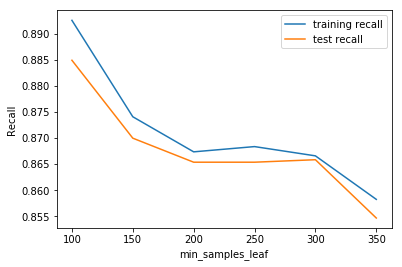

In [368]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation: ** Between 100 to 125 leaf samples

#### Tuning min_samples_split

In [369]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

In [370]:
# instantiate the model
rf = RandomForestClassifier()

In [371]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [372]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Raghavendra\Anaconda3\lib\si

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.176167,0.061341,0.029361,0.000467,200,{'min_samples_split': 200},0.877341,0.914630,0.919378,0.903782,0.018798,1,0.925970,0.907482,0.912567,0.915340,0.007798
1,1.069761,0.005720,0.028031,0.000825,250,{'min_samples_split': 250},0.864329,0.907648,0.908269,0.893414,0.020569,2,0.913275,0.901690,0.902729,0.905898,0.005233
2,1.070426,0.030092,0.029027,0.002451,300,{'min_samples_split': 300},0.853063,0.908600,0.902238,0.887966,0.024818,3,0.903594,0.902484,0.895430,0.900503,0.003615
3,1.538757,0.383735,0.032358,0.007548,350,{'min_samples_split': 350},0.857982,0.894319,0.908903,0.887067,0.021412,4,0.900103,0.891930,0.895985,0.896006,0.003337
4,1.036401,0.017927,0.029022,0.000816,400,{'min_samples_split': 400},0.847985,0.887496,0.895255,0.876911,0.020698,6,0.893755,0.879791,0.882894,0.885480,0.005987


C:\Users\Raghavendra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


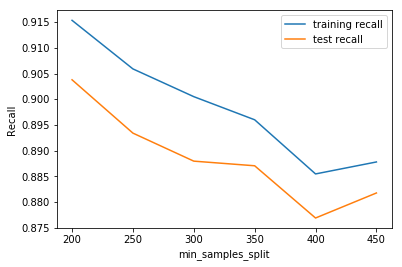

In [373]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

** Observation: ** About 200 min samples split for a high recall


#### Grid Search to Find Optimal Hyperparameters

In [377]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(12, 14, 2),
    'min_samples_leaf': [100],
    'min_samples_split': [200],
    'n_estimators': [500], 
    'max_features': [30]
}


In [378]:
# Create a random forest model
rf = RandomForestClassifier()

In [379]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'recall',
                          cv = 3, n_jobs = -1,verbose = 1)


In [380]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(12, 14, 2), 'min_samples_leaf': [100], 'min_samples_split': [200], 'n_estimators': [500], 'max_features': [30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [381]:
# printing the optimal score and hyperparameters
print("Best Score", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Score 0.9009256810367627
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Fitting the final model with the best parameters obtained from grid search.

In [382]:
# model with the best hyperparameters
rfc = RandomForestClassifier(criterion='entropy',
                             bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [383]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [384]:
# predict
y_pred = rfc.predict(X_test)

In [390]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred) * 100)
print('Recall Score: ', metrics.recall_score(y_test, y_pred) * 100)
print('AUC Score: ', metrics.roc_auc_score(y_test, y_pred) * 100)
print('Precision Score: ', metrics.precision_score(y_test, y_pred) * 100)




Accuracy Score: 90.46209879353518
Recall Score:  78.57142857142857
AUC Score:  84.998066647919
Precision Score:  42.58649093904448


In [391]:
importances = rfc.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
feat_names = churn.columns.values

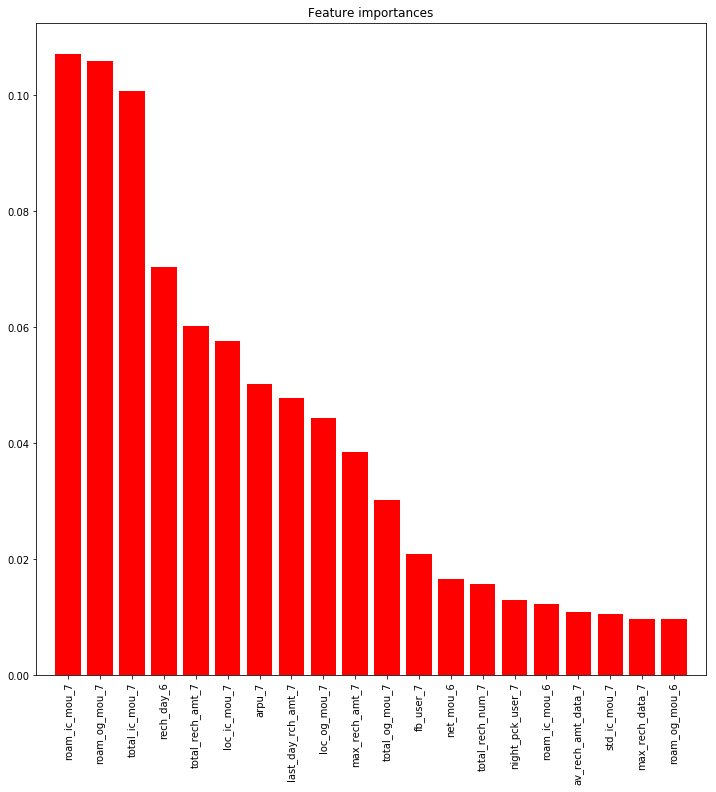

In [392]:
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

### We have used three Algorithms to determine the important features to predict the Churners. 

We can use any of the three models and get the Important features and their effect:

## We will use the output from the **Random Forests ** to know the significant features:

## The above graph shows the Important features obtained using Random Forests. The same is listed below as well

#### 'total_ic_mou_7', 'loc_ic_mou_7', 'total_og_mou_7', 'loc_og_mou_7',
#### 'arpu_7', 'total_rech_amt_7', 'max_rech_amt_7',
#### 'last_day_rch_amt_7', 'roam_og_mou_7', 'roam_ic_mou_7', 'net_mou_6',
#### 'rech_day_6', 'fb_user_7', 'av_rech_amt_data_7', 'std_ic_mou_7',
#### 'std_og_mou_6', 'max_rech_data_7', 'std_og_mou_7',
#### 'total_rech_num_6', 'roam_og_mou_6'


## Strategies to manage customer churn

#### - Obtaining new customers is more expensive than retaining existing customers. Thus, it is important to realize that  retaining existing customers is essential

#### - Identifying the customers that are likely to churn not only helps in retaining customers, but also in marketing, customer service, sales and finance

#### - Focus should be on targeting high value customers who are most likely to respond to an attractive offer and churn

#### - Total incoming minutes of usage - This may indicate a high level of influence a caller has, since other users may be calling for advice, hence its important to tap those customers

#### - Average Revenue Per User (ARPU) - Offer more value added services i.e combined packages to increase the ARPU. Categorize the customers based on ARPU and provide privileged support, this can help increase levels of customer satisfaction 

#### - Offer more discount based on Age on Network. For customers that have spent more 90 days, provide 100% talk time, for those who have spent upto 180 days, provide 103% talk time, 181 days and higher - provide 105% talk time. Special offers may also include special prepaid cards and sms offers
